# NYC Neighborhood Residential Real Estate Analysis
### Applying Data Science Tools to  

    Josh Grasso | joshgrasso@gmail.com

Which NYC neighborhoods are the next great residential real estate investment and development stories? 

The aim of this project is to provide real-time insights into the post-COVID re-opening of Bright Horizons' network of daycare centers by leveraging the Google Maps API. 

These insights include two main parameters: . 

These insights lower risk/uncertainty regarding the current status of BFAM's daycare business, regardless of opinion of the future trajectory of a re-opening.   


In [1]:
import numpy as np
import pandas as pd
import requests

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('seaborn')  
sns.set()

from datetime import datetime
today = datetime.now()
month,day,year = today.month,today.day,today.year

In [2]:
from pathlib import Path
home_path = Path.home() / 'Jupyter' / 'Real_Estate'

In [3]:
# NYC Dept. of Finance: Neighborhood Sales Summary

# Statistical summary of sales for all 5 boroughs for 1, 2 and 3 Family homes
# Neighborhood Sales Data from 2005 through 2019
# Source: https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page

brooklyn_url = 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/neighborhood_sales/2019/2019_brooklyn_sales_prices.xlsx'
queens_url = 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/neighborhood_sales/2019/2019_queens_sales_prices.xlsx'
bronx_url = 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/neighborhood_sales/2019/2019_bronx_sales_prices.xlsx'
manhattan_url = 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/neighborhood_sales/2019/2019_manhattan_sales_prices.xlsx'
staten_island_url = 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/neighborhood_sales/2019/2019_staten_island_sales_prices.xlsx'

borough_list = ['Brooklyn', 'Queens', 'Bronx', 'Manhattan', 'Staten_Island']
sales_summary_url_list = [brooklyn_url, queens_url, bronx_url, manhattan_url, staten_island_url]
sales_summary_url_dict = dict(zip(borough_list, sales_summary_url_list))

sales_summary_xls_list = ['Brooklyn_Sales_Value.xls', 'Queens_Sales_Value.xls',
                          'Bronx_Sales_Value.xls', 'Manhattan_Sales_Value.xls',
                          'Staten_Island_Sales_Value.xls']
sales_summary_xls_dict = dict(zip(borough_list, sales_summary_xls_list))

sales_summary_df_dict = dict.fromkeys(borough_list)

In [4]:
def parse_nyc_sales(sales_summary_url, sales_summary_xls):
    resp = requests.get(sales_summary_url)  # Ex. brooklyn_url
    local_path = home_path / str(sales_summary_xls)  # Ex. 'Brooklyn_Sales_Value.xls'
    with open(local_path, 'wb') as output:
        output.write(resp.content)

    # Loop each Year (Sheets):
    years_list = np.arange(2005, 2020, 1)
    sales_df = pd.DataFrame()
    for year in years_list:
        sheet_name = str(year) + ' Sales'
        year_sales_df = pd.read_excel(local_path, sheet_name=sheet_name, header=3)
        year_sales_df['Year'] = year
        sales_df = sales_df.append(year_sales_df)
    return sales_df

In [5]:
# Aggregate All Sales Data for Each Borough:
sales_summary_df = pd.DataFrame()
for borough in borough_list:
    _borough_sales = parse_nyc_sales(sales_summary_url_dict[borough],sales_summary_xls_dict[borough])
    _borough_sales['Borough'] = borough
    sales_summary_df = sales_summary_df.append(_borough_sales)

# Re-Format: 
sales_summary_df = sales_summary_df.drop('TOTAL NO. OF PROPERTIES', axis=1)
sales_summary_df['TYPE OF HOME'] = sales_summary_df['TYPE OF HOME'].str.rstrip()
sales_summary_df['NEIGHBORHOOD'] = sales_summary_df['NEIGHBORHOOD'].str.rstrip().apply(lambda x: x.title())


In [7]:
# Map Neighborhood names in NYC Sales data to Official NYC Neighborhoods

# Source: https://www1.nyc.gov/site/planning/data-maps/city-neighborhoods.page#nycmap

# Sales-neighborhood - to - actual neighborhood
map_brooklyn_neighborhoods_dict = {'Bush Terminal': 'Sunset Park',
                                   'Cobble Hill-West': 'Cobble Hill',  
                                   'Downtown-Fulton Ferry': 'Brooklyn Heights',
                                   'Downtown-Fulton Mall': 'Downtown',
                                   'Downtown-Metrotech': 'Downtown',
                                   'Flatbush-Central': 'Flatbush',
                                   'Flatbush-East': 'East Flatbush',
                                   'Flatbush-Lefferts Garden': 'Flatbush',
                                   'Flatbush-North': 'Flatbush',
                                   'Navy Yard': 'Vinegar Hill',  # Closest to Vinegar Hill on NYC map
                                   'Ocean Parkway-North': 'Ocean Parkway',
                                   'Ocean Parkway-South': 'Ocean Parkway',
                                   'Old Mill Basin': 'Mill Basin',
                                   'Park Slope South': 'Park Slope',
                                   'Seagate': 'Sea Gate',
                                   'Spring Creek': 'Starrett City',  # Closest to Starrett City on NYC map
                                   'Williamsburg-Central': 'Williamsburg',
                                   'Williamsburg-East': 'East Williamsburg',
                                   # North Side and South Side to Williamsburg
                                   'Williamsburg-North': 'Williamsburg',
                                   'Williamsburg-South': 'Williamsburg',
                                   'Wyckoff Heights': 'Bushwick'}  # Within Bushwick on NYC map
map_queens_neighborhoods_dict = {'Airport La Guardia': 'East Elmhurst',
                                 'Flushing Meadow Park': 'Corona',
                                 'Flushing-North': 'Flushing',
                                 'Flushing-South': 'Flushing',
                                 'Hollis Hills': 'Oakland Gardens',
                                 'Jamaica': 'Jamaica Center',
                                 'So. Jamaica-Baisley Park': 'South Jamaica'}
map_bronx_neighborhoods_dict = {'Bathgate': 'Belmont',
                                'Bedford Park/Norwood': 'Bedford Park',
                                'Bronx Park': 'Allerton',
                                'Castle Hill/Unionport': 'Castle Hill',
                                'City Island-Pelham Strip': 'City Island',
                                'Co-Op City': 'Co-op City',
                                'Crotona Park': 'Morrisania',
                                'Highbridge/Morris Heights': 'High  Bridge',
                                'Kingsbridge Hts/Univ Hts': 'Kingsbridge Heights',
                                'Kingsbridge/Jerome Park': 'Kingsbridge',
                                'Melrose/Concourse': 'Melrose',
                                'Morris Park/Van Nest': 'Morris Park',
                                'Morrisania/Longwood': 'Morrisania',
                                'Mott Haven/Port Morris': 'Mott Haven',
                                'Mount Hope/Mount Eden': 'Mount Hope',
                                'Pelham Parkway North': 'Pelham Parkway',
                                'Pelham Parkway South': 'Pelham Parkway',
                                'Schuylerville/Pelham Bay': 'Schuylerville',
                                'Westchester': 'Westchester Square'}
map_manhattan_neighborhoods_dict = {'Alphabet City': 'Stuyvesant Town',
                                    'Fashion': 'Midtown South',
                                    'Greenwich Village-Central': 'Greenwich Village',
                                    'Greenwich Village-West': 'Greenwich Village',
                                    'Harlem-Central': 'Central Harlem',
                                    'Harlem-East': 'East Harlem',
                                    'Harlem-Upper': 'Central Harlem',  # 'Hamilton Heights'
                                    'Harlem-West': 'Manhattanville',
                                    'Javits Center': 'Hudson Yards',
                                    'Kips Bay': 'Murray Hill',
                                    'Midtown East': 'Turtle Bay',
                                    'Midtown West': 'Clinton',
                                    'Southbridge': 'Financial District',
                                    'Upper East Side (59-79)': 'Upper West Side',
                                    'Upper East Side (79-96)': 'Upper West Side',
                                    'Upper West Side (59-79)': 'Upper West Side',
                                    'Upper West Side (79-96)': 'Upper West Side',
                                    'Upper West Side (96-116)': 'Upper West Side',
                                    'Washington Heights Lower': 'Washington Heights',
                                    'Washington Heights Upper': 'Washington Heights'}
map_staten_island_neighborhoods_dict = {'Arrochar-Shore Acres': 'Arrochar',
                                        'Clove Lakes': 'Castleton Corners',
                                        'Concord-Fox Hills': 'Concord',
                                        'Dongan Hills-Colony': 'Dongan Hills',
                                        'Dongan Hills-Old Town': 'Dongan Hills',
                                        'Fresh Kills': 'Travis',
                                        'Great Kills-Bay Terrace': 'Great Kills',
                                        'Livingston': 'Manor Heights',
                                        'Mariners Harbor': "Mariner's Harbor",
                                        'New Brighton-St. George': 'New Brighton',
                                        'New Dorp-Beach': 'New Dorp',
                                        'New Dorp-Heights': 'New Dorp',
                                        'Oakwood-Beach': 'Oakwood',
                                        'Princes Bay': "Prince's Bay",
                                        'Richmondtown': 'Richmond Town',
                                        'Richmondtown-Lighths Hill': 'Richmond Town',
                                        'Rossville-Charleston': 'Rossville',
                                        'Rossville-Port Mobil': 'Rossville',
                                        'Rossville-Richmond Valley': 'Rossville',
                                        'Stapleton-Clifton': 'Stapleton',
                                        'West New Brighton': 'New Brighton'}

map_drop_neighborhoods_dict = {'Brooklyn-Unknown': np.nan,
                               'Queens-Unknown': np.nan,
                               'Jamaica Bay': np.nan,
                               '': np.nan,
                               'Staten Island-Unknown': np.nan}

rename_neighborhoods_dict = {**map_brooklyn_neighborhoods_dict, **map_queens_neighborhoods_dict, 
                            **map_bronx_neighborhoods_dict, **map_manhattan_neighborhoods_dict, 
                            **map_staten_island_neighborhoods_dict, **map_drop_neighborhoods_dict}

In [8]:
# Consolidate mutiple naming conventions:
rename_type_home_dict = {'01 ONE FAMILY DWELLINGS': '01 ONE FAMILY HOMES', 
                         '02 TWO FAMILY DWELLINGS': '02 TWO FAMILY HOMES', 
                         '03 THREE FAMILY DWELLINGS': '03 THREE FAMILY HOMES',
                         '01  ONE FAMILY HOMES': '01 ONE FAMILY HOMES', 
                         '02  TWO FAMILY HOMES': '02 TWO FAMILY HOMES', 
                         '03  THREE FAMILY HOMES': '03 THREE FAMILY HOMES'}

In [9]:
# Map correct names from above dicts
sales_summary_df['Neighborhood'] = [rename_neighborhoods_dict.get(key,key) for key in sales_summary_df['NEIGHBORHOOD']]
sales_summary_df['Type_of_Home'] = [rename_type_home_dict.get(key,key) for key in sales_summary_df['TYPE OF HOME']]


In [10]:
sales_summary_df[['Borough','Neighborhood', 'Type_of_Home', 'Year', 'NUMBER OF SALES']]

,Borough,Neighborhood,Type_of_Home,Year,NUMBER OF SALES
0,Brooklyn,Bath Beach,01 ONE FAMILY HOMES,2005,30
1,Brooklyn,Bath Beach,02 TWO FAMILY HOMES,2005,98
2,Brooklyn,Bath Beach,03 THREE FAMILY HOMES,2005,39
3,Brooklyn,Bay Ridge,01 ONE FAMILY HOMES,2005,162
4,Brooklyn,Bay Ridge,02 TWO FAMILY HOMES,2005,161
...,...,...,...,...,...
115,Staten_Island,Westerleigh,02 TWO FAMILY HOMES,2019,32
116,Staten_Island,Willowbrook,01 ONE FAMILY HOMES,2019,72
117,Staten_Island,Willowbrook,02 TWO FAMILY HOMES,2019,16
118,Staten_Island,Woodrow,01 ONE FAMILY HOMES,2019,76


In [11]:
# Average Price for One Family, Accross All Years (2005 - 2019):

single_family_avg_df = sales_summary_df.copy()
single_family_avg_df = single_family_avg_df[single_family_avg_df['Type_of_Home'] == '01 ONE FAMILY HOMES']

# Weighted Average Accross # of Sales
single_family_avg_df['Total_Value'] = (single_family_avg_df['AVERAGE SALE PRICE'] / 1000  # in $000's now
                                       * single_family_avg_df['NUMBER OF SALES'])
single_family_avg_df = single_family_avg_df.groupby(['Borough','Neighborhood']).sum() #.reset_index()
single_family_avg_df['Avg_Price'] = ((single_family_avg_df['Total_Value'] 
                                      / single_family_avg_df['NUMBER OF SALES'])
                                     .apply(lambda x: round(x,0))) 
single_family_avg_df = single_family_avg_df[['NUMBER OF SALES', 'Avg_Price']].sort_values('NUMBER OF SALES')

In [12]:
single_family_avg_df

NUMBER OF SALES  Avg_Price
Borough       Neighborhood                              
Bronx         Allerton                      1      245.0
Manhattan     Midtown South                 1     1950.0
              Flatiron                      1    12000.0
              Civic Center                  1     5450.0
              Manhattanville                2     1530.0
...                                       ...        ...
Queens        Bayside                    4362      726.0
              St. Albans                 4454      382.0
Staten_Island Great Kills                4730      456.0
Queens        South Jamaica              7541      358.0
              Flushing                  10322      684.0

[197 rows x 2 columns]

In [13]:
# Save to CSV: 

#single_family_avg_df


In [14]:
# Pull in Zillow Data: 

growth_zillow_2005_2019_df = pd.read_csv(home_path / 'Zillow' / 'Zillow_NYC_SFR_2005_2019.csv',
                                         index_col=[0,1])
 

In [15]:
growth_zillow_2005_2019_df

Avg_Price_2005_2019  Annual_Growth_2005_2019  \
Borough   Neighborhood                                                       
Queens    Hunters Point              3.332755e+05             29088.598191   
Manhattan Manhattanville             5.030461e+05             42159.332200   
Brooklyn  Crown Heights              8.010362e+05             66981.387734   
          Greenpoint                 1.136574e+06             94784.523436   
          Bedford Stuyvesant         7.782242e+05             61284.251218   
...                                           ...                      ...   
          Vinegar Hill               1.509302e+06            -37586.260571   
Manhattan Little Italy               5.957593e+06           -360353.683626   
Queens    Breezy Point               6.229787e+05            -48111.455639   
          Roxbury                    6.491009e+05            -58344.209790   
Manhattan Battery Park City          1.408595e+06           -133533.101299   

                              Growth_%_2005_2019  
Borough   Neighborhood                            
Queens    Hunters Point                 0.087281  
Manhattan Manhattanville                0.083808  
Brooklyn  Crown Heights                 0.083618  
          Greenpoint                    0.083395  
          Bedford Stuyvesant            0.078749  
...                                          ...  
          Vinegar Hill                 -0.024903  
Manhattan Little Italy                 -0.060486  
Queens    Breezy Point                 -0.077228  
          Roxbury                      -0.089885  
Manhattan Battery Park City            -0.094799  

[235 rows x 3 columns]

In [61]:
# Left Join:
#compare_zillow_df = single_family_avg_df.join((growth_zillow_2005_2019_df['Avg_Price_2005_2019'] / 1000)
#                                              .apply(lambda x: round(x, 0)))

# Test Outer Join:
compare_zillow_df = single_family_avg_df.join((growth_zillow_2005_2019_df['Avg_Price_2005_2019'] / 1000)
                                                   .apply(lambda x: round(x, 0)), how='outer')
# compare_zillow_df[test_compare_zillow_df['Avg_Price'].isna()].shape # 60 rows/neighborhoods

# Missing PLG Test:
# sales_summary_df[sales_summary_df['Neighborhood'] == 'Prospect Lefferts Gardens']
# neighborhood_df[neighborhood_df['Name'] == 'Prospect Lefferts Gardens']
# zhvi_sfr_neighborhood_df[zhvi_sfr_neighborhood_df['RegionName'] == 'Prospect Lefferts Gardens']
# growth_zillow_2005_2019_df.loc['Brooklyn', 'Prospect Lefferts Gardens']
# compare_zillow_df.loc['Brooklyn', 'Prospect Lefferts Gardens']
# '+ missing Neighborhoods at step-0: no sales data for any of the +300 official neighborhoods'

In [62]:
# missing_zillow = compare_zillow_df[compare_zillow_df['Avg_Price_2005_2019'].isna()]
# Delete: missing_neighborhoods_list.append(missing_zillow)
# missing_zillow.shape  # 22 rows

In [63]:
# compare_zillow_df = compare_zillow_df[compare_zillow_df['Avg_Price_2005_2019'].notna()]
compare_zillow_df = compare_zillow_df.rename(columns={'Avg_Price': 'NYC_DoF', 
                                                      'Avg_Price_2005_2019': 'Zillow'})


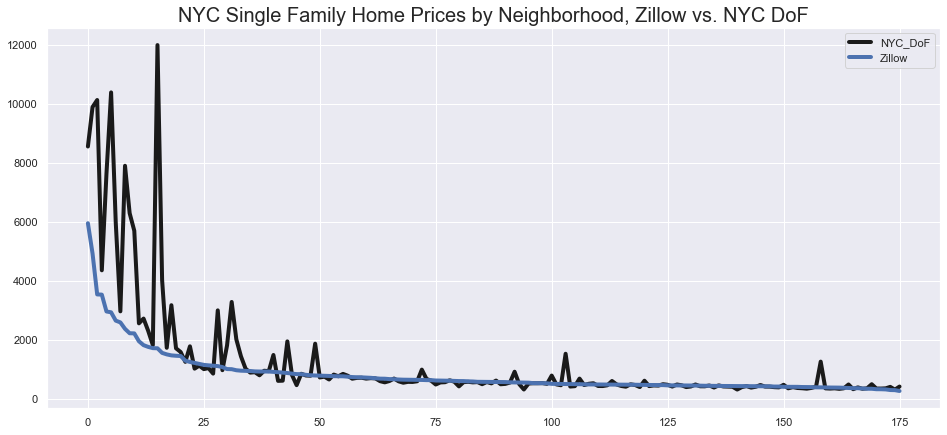

In [64]:
fig, ax = plt.subplots(figsize=(16,7))
plt.title("NYC Single Family Home Prices by Neighborhood, Zillow vs. NYC DoF", fontsize=20);
_sorted = compare_zillow_df.dropna(how='any', axis=0).sort_values('Zillow', ascending=False)
# .sort_values('Zillow', ascending=False)  # .sort_values('NYC_DoF', ascending=False)
_sorted[['NYC_DoF','Zillow']].reset_index(drop=True).plot(ax=ax, color=[u'k', u'b'], linewidth=4);  # 


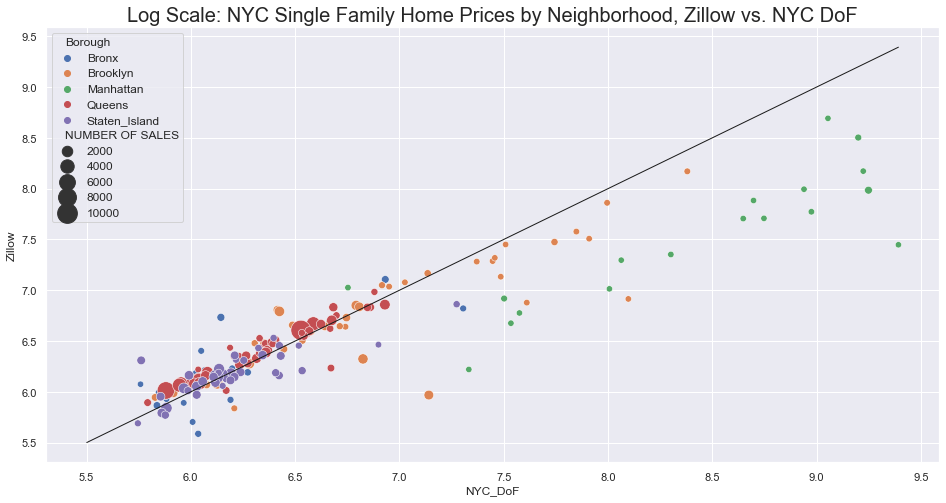

In [65]:
fig, ax = plt.subplots(figsize=(16,8))

log_scale_data = (compare_zillow_df[['NYC_DoF','Zillow']].apply(lambda x: np.log(x))
                 .join(compare_zillow_df['NUMBER OF SALES']))

sns.scatterplot(data=log_scale_data, x='NYC_DoF', y='Zillow', 
               hue=compare_zillow_df.index.droplevel(level=1), size='NUMBER OF SALES', sizes=(40, 400));
# Line of Equality
_x = np.linspace(log_scale_data['NYC_DoF'].min(), log_scale_data['NYC_DoF'].max(), num=100)
ax.plot(_x, _x, color=u'k', linewidth=1, label="Zillow = NYC DoF")
plt.title("Log Scale: NYC Single Family Home Prices by Neighborhood, Zillow vs. NYC DoF", fontsize=20);

In [66]:
# Let's compare Zillow and NYC DoF with Commute Times:

single_route_df = pd.read_csv(filepath_or_buffer= home_path / 'Google_Maps_Single_Route.csv', index_col=0)
zillow_analysis_df = compare_zillow_df.join(single_route_df.set_index(['Borough', 'Neighborhood'])['Travel_time'])


In [67]:
# Missing Commute? 
zillow_analysis_df[zillow_analysis_df['Travel_time'].isna()]

,,NUMBER OF SALES,NYC_DoF,Zillow,Travel_time
Borough,Neighborhood,,,,
Queens,Breezy Point,161.0,487.0,623.0,NaN


In [68]:
zillow_analysis_df = zillow_analysis_df[zillow_analysis_df['Travel_time'].notna()]

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

regr_summary_df = pd.DataFrame(columns=['Labels', 'Features',"R-sq Score","Coefficients","Intercept"])


In [70]:
# Linear Regression:  Commute Time

def linear_regression(df, regr_summary_df, tgt_column_name):
    for label in ['Zillow', 'NYC_DoF']: 
        _df = df[df[label].notna()]
        
        X = np.reshape(_df[tgt_column_name].squeeze().to_numpy(), (-1, 1))
        y = _df[label].to_frame()
        
        regr = LinearRegression()
        regr.fit(X, y)
        
        regr_summary_df = regr_summary_df.append(pd.DataFrame({'Labels': label,
                                                               'Features': tgt_column_name,
                                                               "Model": 'Linear_regression',
                                                                "R-sq Score": round(regr.score(X, y),3),
                                                                "Coefficients": regr.coef_[0][0],
                                                                "Intercept": regr.intercept_[0]},
                                                             index=[regr_summary_df.shape[0]]))
    return regr_summary_df

In [71]:
# Run Linear Regression
regr_summary_df = linear_regression(zillow_analysis_df, regr_summary_df, tgt_column_name='Travel_time')
regr_summary_df

,Labels,Features,R-sq Score,Coefficients,Intercept,Model
0,Zillow,Travel_time,0.241,-20.503509,1965.164680,Linear_regression
1,NYC_DoF,Travel_time,0.293,-48.459772,3837.449242,Linear_regression


In [72]:
color_line_dict = {'NYC_DoF': u'k', 'Zillow': u'c'}

In [108]:
def plot_linear_regression(df, regr_summary_df, tgt_column_name_str):
    fig, ax = plt.subplots(figsize=(15, 7))

    sns.scatterplot(data=df, x=tgt_column_name_str, y='NYC_DoF', ax=ax, color=u'k');
    sns.scatterplot(data=df, x=tgt_column_name_str, y='Zillow', ax=ax, color=u'b');

    for label in ['Zillow', 'NYC_DoF']:
        _rows_df = regr_summary_df[(regr_summary_df['Model'] == 'Linear_regression') 
                                   & (regr_summary_df['Features'] == tgt_column_name_str)]
        _m = _rows_df[_rows_df['Labels'] == label]['Coefficients'].values[0]
        _b = _rows_df[_rows_df['Labels'] == label]['Intercept'].values[0]
        _x = np.linspace(df[tgt_column_name_str].min(), 
                         df[tgt_column_name_str].max(), num=100)

        ax.plot(_x, _x * _m + _b, color=color_line_dict[label], linewidth=4, 
                label="{} Regression Line y = {}x + {}".format(label, round(_m,3), round(_b,3)));
        ax.legend();
    plt.ylabel("Sales Price $ 000's")
    plt.title(f'Linear Regression: Price vs. {tgt_column_name_str}, NYC DoF (Black) vs. Zillow (Blue)', 
    fontsize=20);

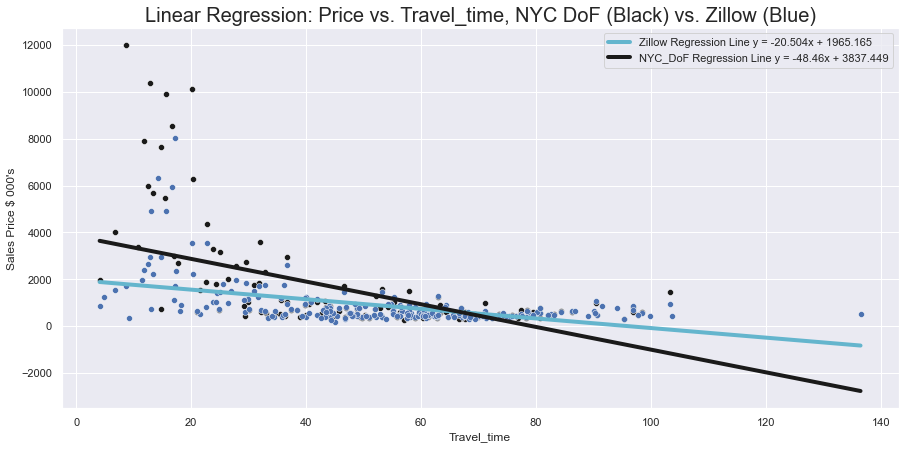

In [109]:
plot_linear_regression(zillow_analysis_df, regr_summary_df, tgt_column_name_str='Travel_time')


In [76]:
# Who is this outlier w/ a high commute travel time? 
zillow_analysis_df.sort_values('Travel_time', axis=0, ascending=True)[-5:]
# Boomfield is the outlier, it's in the industrial part of Staten Island too...
# I'm going to take this out - I'm almost indifferent to the valuation of Boomfield and 
# this only going to have an outsized impact on the parameter optimization for the whole model

# Todt Hill is twice the price of other Staten Island neighborhoods with similar commute times, 
# but it has over 300 transactions in the average and is verified by Zillow data 
# Bloomfield has no Zillow data to support a 10x valuation to other neighborhoods, and only 3 transaction

NUMBER OF SALES  NYC_DoF  Zillow  Travel_time
Borough       Neighborhood                                               
Staten_Island Greenridge                NaN      NaN   441.0    99.816667
              Bloomfield                3.0   5233.0     NaN   101.750000
              Todt Hill               331.0   1443.0   956.0   103.316667
              Bay Terrace               NaN      NaN   449.0   103.683333
              Charleston                NaN      NaN   498.0   136.416667

In [77]:
# Remove Outlier: 

#compare_zillow_df.loc['Staten_Island', 'Bloomfield']
compare_zillow_df = compare_zillow_df.drop(index=('Staten_Island', 'Bloomfield'), axis=0)
# compare_zillow_df.loc['Staten_Island', 'Bloomfield'] 
zillow_analysis_df = compare_zillow_df.join(single_route_df.set_index(['Borough', 'Neighborhood'])['Travel_time'])
zillow_analysis_df = zillow_analysis_df[zillow_analysis_df['Travel_time'].notna()]

In [78]:
regr_summary_df = linear_regression(zillow_analysis_df, regr_summary_df, tgt_column_name='Travel_time')
regr_summary_df

,Labels,Features,R-sq Score,Coefficients,Intercept,Model
0,Zillow,Travel_time,0.241,-20.503509,1965.164680,Linear_regression
1,NYC_DoF,Travel_time,0.293,-48.459772,3837.449242,Linear_regression
2,Zillow,Travel_time,0.241,-20.503509,1965.164680,Linear_regression
3,NYC_DoF,Travel_time,0.335,-51.928474,3989.765559,Linear_regression


In [ ]:
# The NYD DoF model coefficient changed about 3/48 = 7% from removing that one neighborhood,
# and the r-sq imporved by 4%

In [79]:
# Exponential Regression:

from scipy.optimize import curve_fit
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

def exp_func(x, a, b, c):
    return a*np.exp(b*x) + c

def exponential_regression(df, regr_summary_df, p0, tgt_column_name):
    for label in ['Zillow', 'NYC_DoF']:
        _df = df[df[label].notna()]
        
        X = _df[tgt_column_name].squeeze().to_numpy()
        y = _df[label].squeeze().to_numpy()  
        popt, pcov = curve_fit(exp_func, X, y, p0=p0)

        y_pred = exp_func(X, *popt)  # a*np.exp(-b*X) + c
        r2 = round(r2_score(y, y_pred), 3)

        _new_row = pd.DataFrame.from_dict({'Labels': label, 
                                           'Features': tgt_column_name, 
                                           "Model": 'Exp_regression', 
                                           "R-sq Score": r2,
                                           "Coefficients": popt[:-1], 
                                           "Intercept": popt[-1]}, 
                                          orient='index', columns=[regr_summary_df.shape[0]]).T
        regr_summary_df = regr_summary_df.append(_new_row)
    return regr_summary_df


In [80]:
# Exponential Regression:  Commute Time

regr_summary_df = exponential_regression(zillow_analysis_df, regr_summary_df, p0=[10.0, -0.01, 250.0],
                                         tgt_column_name='Travel_time')
regr_summary_df

,Labels,Features,R-sq Score,Coefficients,Intercept,Model
0,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
1,NYC_DoF,Travel_time,0.293,-48.4598,3837.45,Linear_regression
2,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
3,NYC_DoF,Travel_time,0.335,-51.9285,3989.77,Linear_regression
4,Zillow,Travel_time,0.345,"[3300.363850692119, -0.039459278467771315]",276.666,Exp_regression
5,NYC_DoF,Travel_time,0.562,"[10492.065346882859, -0.0568855481301318]",178.269,Exp_regression


In [116]:
def plot_exponential_regression(df, regr_summary_df, tgt_column_name_str):
    fig, ax = plt.subplots(figsize=(15, 7))

    sns.scatterplot(data=df, x=tgt_column_name_str, y='NYC_DoF', ax=ax, color=u'k');
    sns.scatterplot(data=df, x=tgt_column_name_str, y='Zillow', ax=ax, color=u'b');

    for label in ['Zillow', 'NYC_DoF']:
        _rows_df = regr_summary_df[(regr_summary_df['Model'] == 'Exp_regression') 
                                   & (regr_summary_df['Features'] == tgt_column_name_str)]
        _coeffs = _rows_df[_rows_df['Labels'] == label]['Coefficients'].values[0]
        _intercept = _rows_df[_rows_df['Labels'] == label]['Intercept'].values[0]
        
        _x = np.linspace(df[tgt_column_name_str].min(), 
                         df[tgt_column_name_str].max(), num=100)
        y_pred = exp_func(_x, *_coeffs, _intercept)
        
        ax.plot(_x, y_pred, color=color_line_dict[label], linewidth=4,
                label="{} Regression Line y = {}*e^({}*x) + {}".format(label, 
                                                                       *[round(_coeff,3) for _coeff in _coeffs],
                                                                       _intercept));
        ax.legend();
    plt.ylabel("Sales Price $ 000's")
    plt.title(f'Exponential Regression: Price vs. {tgt_column_name_str}, NYC DoF (Black) vs. Zillow (Blue)', 
              fontsize=20);

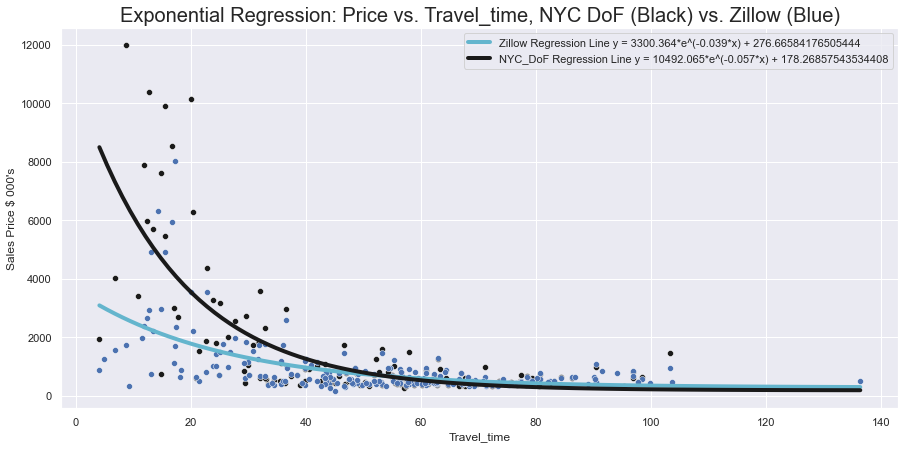

In [117]:
plot_exponential_regression(zillow_analysis_df, regr_summary_df, tgt_column_name_str='Travel_time')

In [88]:
# Pull in School Quality:

final_school_percentile_avg_df = pd.read_csv(filepath_or_buffer= home_path / 'Neighborhood_School_Quality_Percentile_Avg.csv')
school_analysis_df = compare_zillow_df.join(final_school_percentile_avg_df.set_index(['Borough', 'Neighborhood'])['Avg_Percentile'])


In [89]:
# Missing School data:
school_analysis_df[school_analysis_df['Avg_Percentile'].isna()]

NUMBER OF SALES  NYC_DoF  Zillow  Avg_Percentile
Borough   Neighborhood                                                     
Manhattan Midtown                      NaN      NaN  1239.0             NaN
          Midtown South                1.0   1950.0   877.0             NaN
          Stuyvesant Town              6.0   3596.0     NaN             NaN

In [90]:
school_analysis_df = school_analysis_df[school_analysis_df['Avg_Percentile'].notna()]

In [91]:
# Linear Regression:  School Quality

regr_summary_df = linear_regression(school_analysis_df, regr_summary_df, tgt_column_name='Avg_Percentile')
regr_summary_df


,Labels,Features,R-sq Score,Coefficients,Intercept,Model
0,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
1,NYC_DoF,Travel_time,0.293,-48.4598,3837.45,Linear_regression
2,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
3,NYC_DoF,Travel_time,0.335,-51.9285,3989.77,Linear_regression
4,Zillow,Travel_time,0.345,"[3300.363850692119, -0.039459278467771315]",276.666,Exp_regression
5,NYC_DoF,Travel_time,0.562,"[10492.065346882859, -0.0568855481301318]",178.269,Exp_regression
6,Zillow,Avg_Percentile,0.151,1927.24,-289.212,Linear_regression
7,NYC_DoF,Avg_Percentile,0.14,3700.69,-978.881,Linear_regression


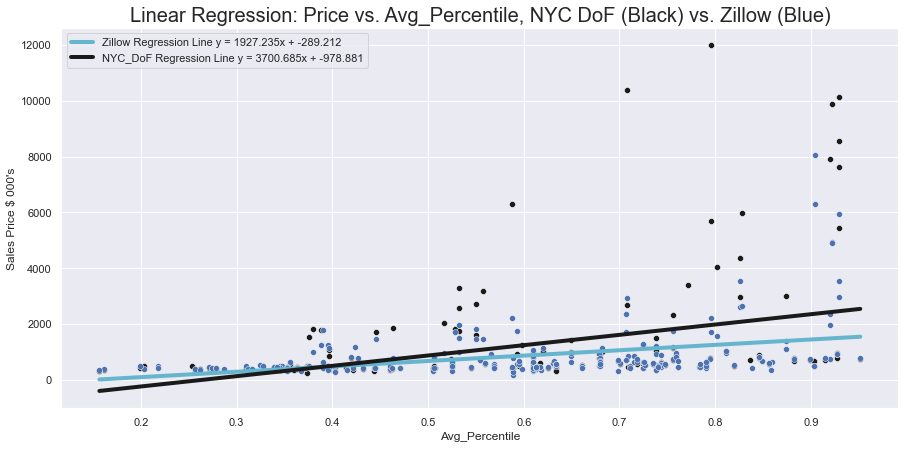

In [118]:
plot_linear_regression(school_analysis_df, regr_summary_df, tgt_column_name_str='Avg_Percentile')

In [99]:
# Exponential Regression:  School Quality

regr_summary_df = exponential_regression(school_analysis_df, regr_summary_df, p0=[10.0, 0.01, 250.0],
                                         tgt_column_name='Avg_Percentile')
regr_summary_df

,Labels,Features,R-sq Score,Coefficients,Intercept,Model
0,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
1,NYC_DoF,Travel_time,0.293,-48.4598,3837.45,Linear_regression
2,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
3,NYC_DoF,Travel_time,0.335,-51.9285,3989.77,Linear_regression
4,Zillow,Travel_time,0.345,"[3300.363850692119, -0.039459278467771315]",276.666,Exp_regression
5,NYC_DoF,Travel_time,0.562,"[10492.065346882859, -0.0568855481301318]",178.269,Exp_regression
6,Zillow,Avg_Percentile,0.151,1927.24,-289.212,Linear_regression
7,NYC_DoF,Avg_Percentile,0.14,3700.69,-978.881,Linear_regression
8,Zillow,Avg_Percentile,0.278,"[0.02681338570370512, 12.112441343458878]",604.203,Exp_regression
9,NYC_DoF,Avg_Percentile,0.221,"[0.4514888196938907, 9.668808017786938]",667.836,Exp_regression


In [39]:
regr_summary_df

,Labels,Features,R-sq Score,Coefficients,Intercept,Model
0,Zillow,Commute_time,0.298,-19.6945,1893.75,Linear_regression
1,NYC_DoF,Commute_time,0.338,-53.852,4139.05,Linear_regression
2,Zillow,Commute_time,0.415,"[3146.9948020579595, -0.04019163999735424]",311.914,Exp_regression
3,NYC_DoF,Commute_time,0.588,"[11287.912451223057, -0.05675331038933146]",150.529,Exp_regression
4,Zillow,School_quality,0.165,1646.8,-158.913,Linear_regression
5,NYC_DoF,School_quality,0.125,3678.98,-984.338,Linear_regression
6,Zillow,School_quality,0.251,"[0.1498870204078838, 9.942667210902828]",600.009,Exp_regression
7,NYC_DoF,School_quality,0.201,"[0.4421478881280353, 9.671021754767313]",683.764,Exp_regression


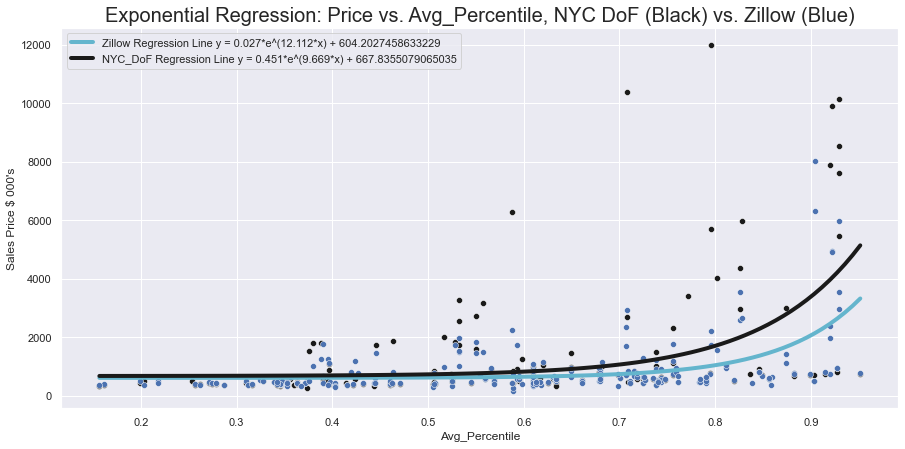

In [119]:
plot_exponential_regression(school_analysis_df, regr_summary_df, tgt_column_name_str='Avg_Percentile')

In [120]:
# Neighborhood Safety / Crime

nyc_shootings_avg_df = pd.read_csv(filepath_or_buffer= home_path / 'NYC_Neighborhood_Shootings_Avg.csv')
nyc_shootings_avg_df = nyc_shootings_avg_df.rename(columns={'Name': 'Neighborhood'})

crime_anlysis = compare_zillow_df.join(nyc_shootings_avg_df.set_index(['Borough','Neighborhood']))


In [121]:
# Fill missing Neighborhoods with 0 shootings:
crime_anlysis[crime_anlysis['Avg_Shootings'].isna()]


NUMBER OF SALES  NYC_DoF  Zillow  \
Borough       Neighborhood                                          
Brooklyn      Bergen Beach                 649.0    630.0   615.0   
              Dumbo                          NaN      NaN  1491.0   
              Manhattan Beach              385.0   1256.0  1296.0   
Manhattan     Battery Park City              NaN      NaN  1409.0   
              Soho                          21.0   7631.0  2965.0   
              Sutton Place                   NaN      NaN  1964.0   
              Tudor City                     NaN      NaN   740.0   
Queens        Bellerose                   1663.0    510.0   527.0   
              Breezy Point                 161.0    487.0   623.0   
              Broad Channel                300.0    350.0   327.0   
              Douglaston                   869.0    954.0   928.0   
              Little Neck                 1241.0    799.0   928.0   
              Roxbury                        NaN      NaN   649.0   
Staten_Island Bay Terrace                    NaN      NaN   449.0   
              Butler Manor                   NaN      NaN   777.0   
              Charleston                     NaN      NaN   498.0   
              Concord                      994.0    318.0   550.0   
              Eltingville                 2315.0    470.0   479.0   
              Emerson Hill                 116.0    992.0   642.0   
              Great Kills                 4730.0    456.0   469.0   
              Lighthouse Hill                NaN      NaN   840.0   
              Midland Beach               1801.0    415.0   426.0   
              New Springville             1395.0    454.0   442.0   
              Prince's Bay                 699.0    617.0   636.0   
              Richmond Town                738.0    688.0   497.0   

                                 Avg_Shootings  
Borough       Neighborhood                      
Brooklyn      Bergen Beach                 NaN  
              Dumbo                        NaN  
              Manhattan Beach              NaN  
Manhattan     Battery Park City            NaN  
              Soho                         NaN  
              Sutton Place                 NaN  
              Tudor City                   NaN  
Queens        Bellerose                    NaN  
              Breezy Point                 NaN  
              Broad Channel                NaN  
              Douglaston                   NaN  
              Little Neck                  NaN  
              Roxbury                      NaN  
Staten_Island Bay Terrace                  NaN  
              Butler Manor                 NaN  
              Charleston                   NaN  
              Concord                      NaN  
              Eltingville                  NaN  
              Emerson Hill                 NaN  
              Great Kills                  NaN  
              Lighthouse Hill              NaN  
              Midland Beach                NaN  
              New Springville              NaN  
              Prince's Bay                 NaN  
              Richmond Town                NaN

In [122]:
crime_anlysis['Avg_Shootings'] = crime_anlysis['Avg_Shootings'].fillna(0)

In [123]:
# Linear Regression: Neighborhood Safety 

regr_summary_df = linear_regression(crime_anlysis, regr_summary_df, tgt_column_name='Avg_Shootings')
regr_summary_df


,Labels,Features,R-sq Score,Coefficients,Intercept,Model
0,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
1,NYC_DoF,Travel_time,0.293,-48.4598,3837.45,Linear_regression
2,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
3,NYC_DoF,Travel_time,0.335,-51.9285,3989.77,Linear_regression
4,Zillow,Travel_time,0.345,"[3300.363850692119, -0.039459278467771315]",276.666,Exp_regression
5,NYC_DoF,Travel_time,0.562,"[10492.065346882859, -0.0568855481301318]",178.269,Exp_regression
6,Zillow,Avg_Percentile,0.151,1927.24,-289.212,Linear_regression
7,NYC_DoF,Avg_Percentile,0.14,3700.69,-978.881,Linear_regression
8,Zillow,Avg_Percentile,0.278,"[0.02681338570370512, 12.112441343458878]",604.203,Exp_regression
9,NYC_DoF,Avg_Percentile,0.221,"[0.4514888196938907, 9.668808017786938]",667.836,Exp_regression


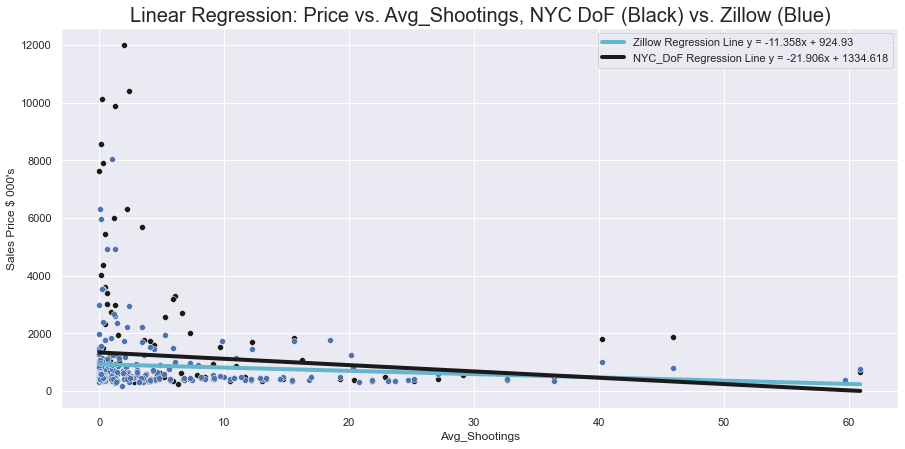

In [124]:
plot_linear_regression(crime_anlysis, regr_summary_df, tgt_column_name_str='Avg_Shootings')

In [125]:
# Interested in what the two outliers are w/ 40-50 shootings and $1.0-$2.0mm avg. single-family home prices:
# Harlem is the outlier
crime_anlysis.sort_values('Avg_Shootings', ascending=True).iloc[-5:]

NUMBER OF SALES  NYC_DoF  Zillow  Avg_Shootings
Borough   Neighborhood                                                       
Brooklyn  Ocean Hill                    171.0    497.0   343.0      36.428571
Manhattan Central Harlem                182.0   1812.0  1011.0      40.285714
          East Harlem                    23.0   1872.0   793.0      45.928571
Brooklyn  Brownsville                   490.0    340.0   382.0      59.714286
          Bedford Stuyvesant            649.0    657.0   778.0      60.928571

In [135]:
# Exponential Regression: Neighborhood Safety 

regr_summary_df = exponential_regression(crime_anlysis, regr_summary_df, p0=[100.0, -0.1, 250.0],
                                         tgt_column_name='Avg_Shootings')
regr_summary_df


,Labels,Features,R-sq Score,Coefficients,Intercept,Model
0,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
1,NYC_DoF,Travel_time,0.293,-48.4598,3837.45,Linear_regression
2,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
3,NYC_DoF,Travel_time,0.335,-51.9285,3989.77,Linear_regression
4,Zillow,Travel_time,0.345,"[3300.363850692119, -0.039459278467771315]",276.666,Exp_regression
5,NYC_DoF,Travel_time,0.562,"[10492.065346882859, -0.0568855481301318]",178.269,Exp_regression
6,Zillow,Avg_Percentile,0.151,1927.24,-289.212,Linear_regression
7,NYC_DoF,Avg_Percentile,0.14,3700.69,-978.881,Linear_regression
8,Zillow,Avg_Percentile,0.278,"[0.02681338570370512, 12.112441343458878]",604.203,Exp_regression
9,NYC_DoF,Avg_Percentile,0.221,"[0.4514888196938907, 9.668808017786938]",667.836,Exp_regression


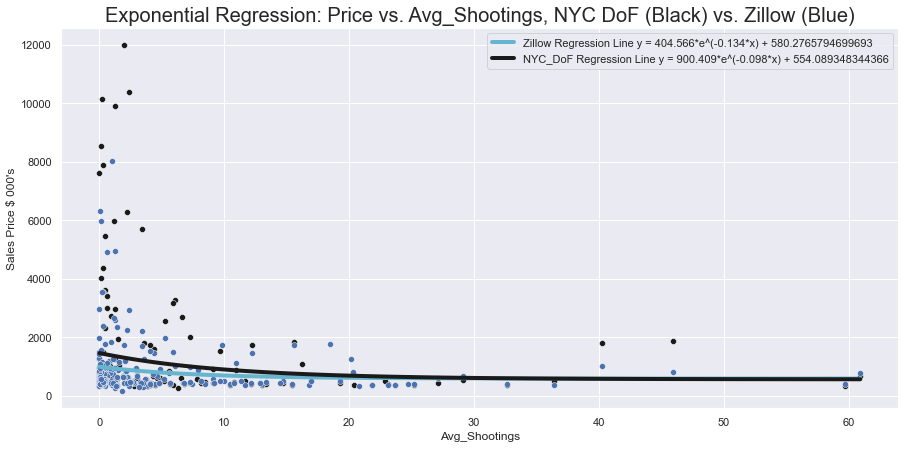

In [134]:
plot_exponential_regression(crime_anlysis, regr_summary_df, tgt_column_name_str='Avg_Shootings')

In [52]:
# Seems to be a poor predictor of Average Prices.
# Maybe the change in shootings is a better predictor of the change in Average prices? (a Momentum indicator)

In [137]:
# Neighborhood Quality
neighborhood_quality_df = pd.read_csv(home_path / 'FourSquare_Neighborhood_Quality_df.csv')
neighborhood_quality_df = (neighborhood_quality_df.rename(columns={'NYC_Neighborhood': 'Neighborhood'})
                           .set_index(['Borough','Neighborhood']))


In [138]:
foursquare_anlysis = compare_zillow_df.join(neighborhood_quality_df)

foursquare_anlysis

NUMBER OF SALES  NYC_DoF  Zillow  Above_8point5  \
Borough       Neighborhood                                                     
Bronx         Allerton                   1.0    245.0     NaN            1.0   
              Baychester              1348.0    358.0   385.0            1.0   
              Bedford Park             233.0    488.0   373.0            0.0   
              Belmont                  116.0    346.0   401.0           11.0   
              Bronxdale                764.0    378.0     NaN            4.0   
...                                      ...      ...     ...            ...   
Staten_Island Travis                   665.0    398.0   408.0            0.0   
              West Brighton              NaN      NaN   451.0            0.0   
              Westerleigh             1295.0    450.0   467.0            0.0   
              Willowbrook             1026.0    488.0   452.0            0.0   
              Woodrow                  936.0    498.0   578.0            0.0   

                             Above_8  Above_9  
Borough       Neighborhood                     
Bronx         Allerton           3.0      0.0  
              Baychester         1.0      0.0  
              Bedford Park       1.0      0.0  
              Belmont           25.0      6.0  
              Bronxdale          6.0      1.0  
...                              ...      ...  
Staten_Island Travis             2.0      0.0  
              West Brighton      4.0      0.0  
              Westerleigh        2.0      0.0  
              Willowbrook        0.0      0.0  
              Woodrow            1.0      0.0  

[255 rows x 6 columns]

In [139]:
# Missing FourSquare Restaurant data:
foursquare_anlysis[foursquare_anlysis['Above_8point5'].isna()] 


,,NUMBER OF SALES,NYC_DoF,Zillow,Above_8point5,Above_8,Above_9
Borough,Neighborhood,,,,,,
Staten_Island,Todt Hill,331.0,1443.0,956.0,NaN,NaN,NaN


In [140]:
foursquare_anlysis = foursquare_anlysis[foursquare_anlysis['Above_8point5'].notna()]

In [142]:
# Let's test each of the three metrics against the sales price data, and pick the best one:
# Linear Regression: Restaurant Quality Metric Test

foursquare_test_regr_df = pd.DataFrame()
i = 0
for metric in ['Above_8point5','Above_8','Above_9']:
    for label in ['Zillow', 'NYC_DoF']: 
        _df = foursquare_anlysis[foursquare_anlysis[label].notna()]
        
        X = np.reshape(_df[metric].squeeze().to_numpy(), (-1, 1))
        y = _df[label].to_frame()

        regr = LinearRegression()
        regr.fit(X, y)

        foursquare_test_regr_df = foursquare_test_regr_df.append(pd.DataFrame({'Labels': label,
                                                               'Features': metric,
                                                               "Model": 'Linear_regression',
                                                                "R-sq Score": round(regr.score(X, y),3),
                                                                "Coefficients": regr.coef_[0][0],
                                                                "Intercept": regr.intercept_[0]},
                                                                        index=[i]))
        i += 1


In [143]:
foursquare_test_regr_df.sort_values('R-sq Score', ascending=False)

,Labels,Features,Model,R-sq Score,Coefficients,Intercept
1,NYC_DoF,Above_8point5,Linear_regression,0.589,188.047922,323.033231
3,NYC_DoF,Above_8,Linear_regression,0.537,108.780112,226.503493
5,NYC_DoF,Above_9,Linear_regression,0.526,387.490811,467.776787
0,Zillow,Above_8point5,Linear_regression,0.458,81.410191,483.450674
4,Zillow,Above_9,Linear_regression,0.432,171.602238,532.599864
2,Zillow,Above_8,Linear_regression,0.417,47.265022,441.851958


In [144]:
# A Rating above 8.5 has the strongest linear correlation for both datasets, and a very good one too
# Let's visualize it and see if the model should be linear or exponential

# Add 8.5 to regression summary datatable:
view_8point5_df = foursquare_test_regr_df[foursquare_test_regr_df['Features'] == 'Above_8point5']
regr_summary_df = regr_summary_df.append(view_8point5_df)
regr_summary_df

,Labels,Features,R-sq Score,Coefficients,Intercept,Model
0,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
1,NYC_DoF,Travel_time,0.293,-48.4598,3837.45,Linear_regression
2,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
3,NYC_DoF,Travel_time,0.335,-51.9285,3989.77,Linear_regression
4,Zillow,Travel_time,0.345,"[3300.363850692119, -0.039459278467771315]",276.666,Exp_regression
5,NYC_DoF,Travel_time,0.562,"[10492.065346882859, -0.0568855481301318]",178.269,Exp_regression
6,Zillow,Avg_Percentile,0.151,1927.24,-289.212,Linear_regression
7,NYC_DoF,Avg_Percentile,0.14,3700.69,-978.881,Linear_regression
8,Zillow,Avg_Percentile,0.278,"[0.02681338570370512, 12.112441343458878]",604.203,Exp_regression
9,NYC_DoF,Avg_Percentile,0.221,"[0.4514888196938907, 9.668808017786938]",667.836,Exp_regression


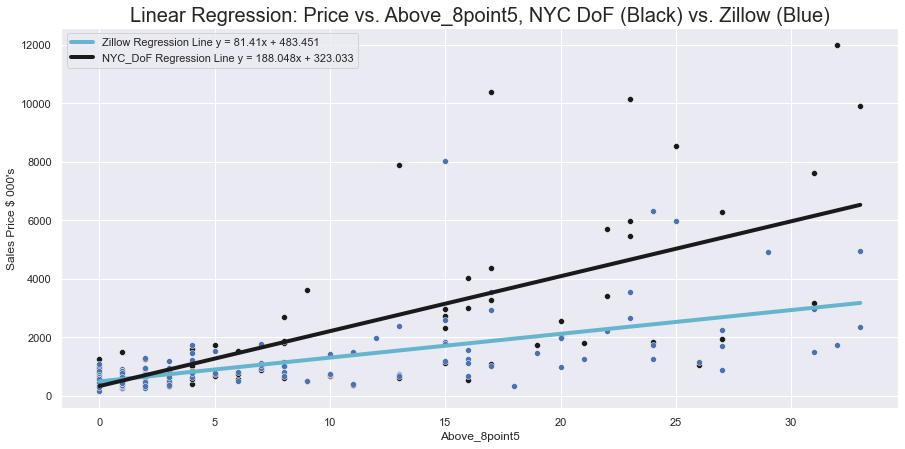

In [145]:
plot_linear_regression(foursquare_anlysis, regr_summary_df, tgt_column_name_str='Above_8point5')

In [146]:
# Exponential Regression: School Quality

regr_summary_df = exponential_regression(foursquare_anlysis, regr_summary_df, p0=[10.0, 0.1, 250.0],
                                         tgt_column_name='Above_8point5')
regr_summary_df


,Labels,Features,R-sq Score,Coefficients,Intercept,Model
0,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
1,NYC_DoF,Travel_time,0.293,-48.4598,3837.45,Linear_regression
2,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
3,NYC_DoF,Travel_time,0.335,-51.9285,3989.77,Linear_regression
4,Zillow,Travel_time,0.345,"[3300.363850692119, -0.039459278467771315]",276.666,Exp_regression
5,NYC_DoF,Travel_time,0.562,"[10492.065346882859, -0.0568855481301318]",178.269,Exp_regression
6,Zillow,Avg_Percentile,0.151,1927.24,-289.212,Linear_regression
7,NYC_DoF,Avg_Percentile,0.14,3700.69,-978.881,Linear_regression
8,Zillow,Avg_Percentile,0.278,"[0.02681338570370512, 12.112441343458878]",604.203,Exp_regression
9,NYC_DoF,Avg_Percentile,0.221,"[0.4514888196938907, 9.668808017786938]",667.836,Exp_regression


In [ ]:
# DELETE: 
# New Zillow model looks very different from the last one:
# Zillow	Foursquare_Above_8point5	0.558	
# [4591.699301592901, 0.013294241545088188]	-4089.66	Exp_regression

In [63]:
# Exponential vs. Linear does slighlty better for modeling FourSquare Restaurant Ratings

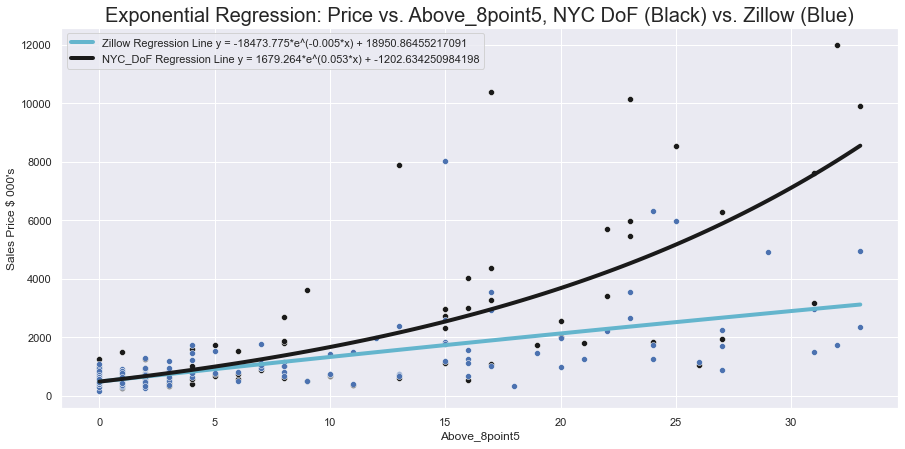

In [148]:
plot_exponential_regression(foursquare_anlysis, regr_summary_df, tgt_column_name_str='Above_8point5')

In [149]:
# Multinomial Regression: Exponential

# Exponential: multi_nomial_anlysis

def multi_exp_func(X_list, a, b, c, d, e, f, g, h):
    x1 = X_list[0]  # Commute Time
    x2 = X_list[1]  # School Quality
    x3 = X_list[2]  # Shootings/Crime
    x4 = X_list[3]  # FourSquare Neighborhood Quality
    
    #      Commute Time   School Quality   Shootings/Crime(linear)  FourSquare Neighborhood Quality
    return a*np.exp(b*x1) + c*np.exp(d*x2) + e*x3 + f*np.exp(g*x4) + h


In [157]:
# Build multi_nomial_anlysis df
multi_nomial_anlysis_df = compare_zillow_df.join(single_route_df.set_index(['Borough', 'Neighborhood'])['Travel_time'])
multi_nomial_anlysis_df = multi_nomial_anlysis_df.join(final_school_percentile_avg_df.set_index(['Borough', 'Neighborhood'])['Avg_Percentile'])
multi_nomial_anlysis_df = multi_nomial_anlysis_df.join(nyc_shootings_avg_df.set_index(['Borough','Neighborhood']))
multi_nomial_anlysis_df = multi_nomial_anlysis_df.join(neighborhood_quality_df['Above_8point5'])

# Run the regression on Neighborhoods without Missing Values: Add Neighborhoods back afer
multi_nomial_anlysis_df = multi_nomial_anlysis_df[multi_nomial_anlysis_df['Travel_time'].notna()]
multi_nomial_anlysis_df['Avg_Shootings'] = multi_nomial_anlysis_df['Avg_Shootings'].fillna(0)
multi_nomial_anlysis_df = multi_nomial_anlysis_df[multi_nomial_anlysis_df['Avg_Percentile'].notna()]
multi_nomial_anlysis_df = multi_nomial_anlysis_df[multi_nomial_anlysis_df['Above_8point5'].notna()]


In [160]:
# Missing PLG?
# multi_nomial_anlysis_df.loc['Brooklyn', 'Prospect Lefferts Gardens']
# multi_nomial_anlysis_df.loc['Manhattan', 'Washington Heights']

In [161]:
multi_nomial_anlysis_df

NUMBER OF SALES  NYC_DoF  Zillow  Travel_time  \
Borough       Neighborhood                                                   
Bronx         Allerton                   1.0    245.0     NaN    57.000000   
              Baychester              1348.0    358.0   385.0    62.750000   
              Bedford Park             233.0    488.0   373.0    39.916667   
              Belmont                  116.0    346.0   401.0    44.083333   
              Bronxdale                764.0    378.0     NaN    49.316667   
...                                      ...      ...     ...          ...   
Staten_Island Travis                   665.0    398.0   408.0    68.433333   
              West Brighton              NaN      NaN   451.0    77.483333   
              Westerleigh             1295.0    450.0   467.0    74.283333   
              Willowbrook             1026.0    488.0   452.0    62.866667   
              Woodrow                  936.0    498.0   578.0    74.300000   

                             Avg_Percentile  Avg_Shootings  Above_8point5  
Borough       Neighborhood                                                 
Bronx         Allerton             0.373751       6.285714            1.0  
              Baychester           0.312059       3.500000            1.0  
              Bedford Park         0.203534      11.642857            0.0  
              Belmont              0.257055      13.000000           11.0  
              Bronxdale            0.313201       3.642857            4.0  
...                                     ...            ...            ...  
Staten_Island Travis               0.612509       0.071429            0.0  
              West Brighton        0.342709       2.428571            0.0  
              Westerleigh          0.740048       0.285714            0.0  
              Willowbrook          0.612509       0.285714            0.0  
              Woodrow              0.784308       0.142857            0.0  

[250 rows x 7 columns]

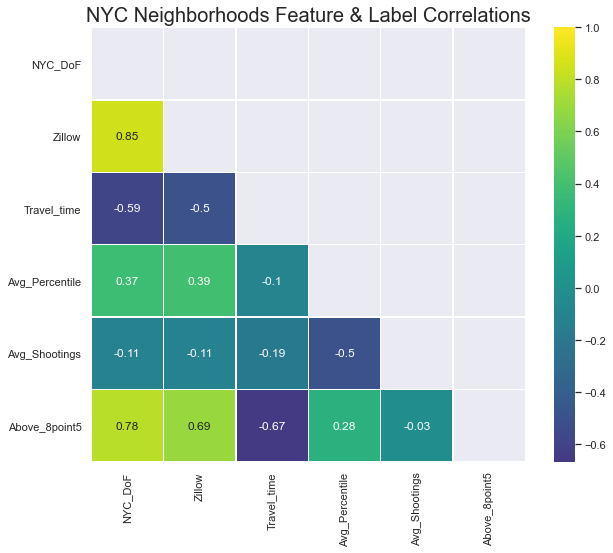

In [162]:
# Feature Correlation:
corr = multi_nomial_anlysis_df[['NYC_DoF', 'Zillow', 'Travel_time', 'Avg_Percentile', 
                               'Avg_Shootings', 'Above_8point5']].corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap=sns.color_palette("viridis", as_cmap=True) # 'PuOr' 'viridis'

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, center=0, vmax=1, annot=True, ax=ax);
plt.title("NYC Neighborhoods Feature & Label Correlations", fontsize=20);

In [163]:
# Correlations Discussion: 
# * The two real estate price datasets are 85% correlated 
# * The FourSquare restaurant rating metric is the feature with the greatest correlation 
# to both housing price datasests at 78% and 69%
# * Commute time is the second highest correlated feature at 59% and 50%, 
# but is 67% correlated with commute time (might lack new information)
# * School quality is the next strongest correlation, at 37% and 39%.
# * The strongest correlation for shootings is with school quality at -50%, which is interesting

In [ ]:
"""
# Linear Regression: School Quality
regr_summary_df = linear_regression(_df, regr_summary_df, tgt_column_name='')
regr_summary_df
plot_linear_regression(_df, regr_summary_df, tgt_column_name_str='')

# Exponential Regression: School Quality
regr_summary_df = exponential_regression(_df, regr_summary_df, p0=[],
                                         tgt_column_name='')
regr_summary_df
plot_exponential_regression(_df, regr_summary_df, tgt_column_name_str='')
"""

In [169]:
# Multinomial Regression:
# Build P0 from prior regressions:
#     a,      b,     c,   d,    e,     f,    g,    h
p0 = [2500.0, -0.05, 0.1, 11.0, -12.0, 1700, 0.05, 250.0]

for label in ['Zillow', 'NYC_DoF']:
    _df = multi_nomial_anlysis_df[multi_nomial_anlysis_df[label].notna()]
    
    x1 = _df['Travel_time'].squeeze().to_numpy()
    x2 = _df['Avg_Percentile'].squeeze().to_numpy()
    x3 = _df['Avg_Shootings'].squeeze().to_numpy()
    x4 = _df['Above_8point5'].squeeze().to_numpy()
    X = [x1, x2, x3, x4]
    y = _df[label].squeeze().to_numpy()

    # Prevent intercept from being negative: 
    # Decreases r-sq for Zillow model slightly (1.2%), but keeps model parameters much, much closer to 
    # the NYC DoF model (closer to reality?)
    _bottom = np.empty(len(p0)); _bottom.fill(-np.inf); _bottom[-1] = 0
    _top = np.empty(len(p0)); _top.fill(np.inf)
    
    popt, pcov = curve_fit(multi_exp_func, X, y, p0=p0, bounds=(_bottom, _top))
    
    y_pred = multi_exp_func(X, *popt)
    r2 = round(r2_score(y, y_pred), 3)
    
    _new_row = pd.DataFrame.from_dict({'Labels': label, 
                                       'Features': 'Multinomial', 
                                       "Model": 'Multinomial_regression', 
                                       "R-sq Score": r2,
                                       "Coefficients": popt[:-1], 
                                       "Intercept": popt[-1]}, 
                                      orient='index', columns=[regr_summary_df.shape[0]]).T
    regr_summary_df = regr_summary_df.append(_new_row) 
    # models_dict[label] = popt

In [176]:
regr_summary_df

,Labels,Features,R-sq Score,Coefficients,Intercept,Model
0,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
1,NYC_DoF,Travel_time,0.293,-48.4598,3837.45,Linear_regression
2,Zillow,Travel_time,0.241,-20.5035,1965.16,Linear_regression
3,NYC_DoF,Travel_time,0.335,-51.9285,3989.77,Linear_regression
4,Zillow,Travel_time,0.345,"[3300.363850692119, -0.039459278467771315]",276.666,Exp_regression
5,NYC_DoF,Travel_time,0.562,"[10492.065346882859, -0.0568855481301318]",178.269,Exp_regression
6,Zillow,Avg_Percentile,0.151,1927.24,-289.212,Linear_regression
7,NYC_DoF,Avg_Percentile,0.14,3700.69,-978.881,Linear_regression
8,Zillow,Avg_Percentile,0.278,"[0.02681338570370512, 12.112441343458878]",604.203,Exp_regression
9,NYC_DoF,Avg_Percentile,0.221,"[0.4514888196938907, 9.668808017786938]",667.836,Exp_regression


In [177]:
# The model has a 80% R-squared for the NYC DoF dataset! 
# And a nearly 60% R-squared for the Zillow dataset. Overall pretty good.

In [179]:
# Calculate Percentiles for each Feature/Variable
# Compare the parameters/"slopes" for the 90th vs. 80th, and 80th vs. 70th etc

feature_percentiles_df = pd.DataFrame()
for percentile in [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]:
    feature_percentiles_df = (feature_percentiles_df.append(
        multi_nomial_anlysis_df[['Travel_time', 'Avg_Percentile', 'Avg_Shootings', 'Above_8point5']]
        .quantile(percentile).apply(lambda x: round(x, 2))))
feature_percentiles_df.index = feature_percentiles_df.index.rename('Percentiles')
#feature_percentiles_df

# Flip Shootings and Travel Time: lower feature value equals more real estate value
feature_percentiles_df['Avg_Shootings'] = pd.Series(feature_percentiles_df['Avg_Shootings'].iloc[::-1].values, index=feature_percentiles_df.index)
feature_percentiles_df['Travel_time'] = pd.Series(feature_percentiles_df['Travel_time'].iloc[::-1].values, index=feature_percentiles_df.index)


In [180]:
feature_percentiles_df = feature_percentiles_df[['Travel_time', 'Avg_Percentile', 
                                                'Avg_Shootings', 'Above_8point5']]

# The Table below buckets the Feature values into Percentiles
# Ex. a commute time to midtown of less than 25 min is in the top 10% of all neighborhoods, 
# over 1 hour is the bottom 40%. 
# The top-half of neighborhoods have had and avg. of 1 or fewer shooting incidents per year, the worst had 60
# Below the top 30% of neighborhoods, there are 3 or fewer restaurants rated +8.5 on FourSquare

feature_percentiles_df

,Travel_time,Avg_Percentile,Avg_Shootings,Above_8point5
Percentiles,,,,
1.0,6.75,0.95,0.00,33.0
0.9,20.25,0.86,0.07,17.0
0.8,32.96,0.77,0.14,8.0
0.7,42.44,0.72,0.29,3.0
0.6,48.07,0.68,0.61,2.0
0.5,55.10,0.61,1.29,1.0
0.4,60.26,0.56,2.36,1.0
0.3,65.00,0.46,3.74,0.0
0.2,71.16,0.39,6.89,0.0


In [181]:
# Build up the forecast - to understand the parameters (and model)

def feature_exp_func(x, a, b):
    return a*np.exp(b*x)

def build_percentile_forecasts(feature_percentiles_df, regr_summary_df, NYC_DoF_or_Zillow_string):
    
    params_multinomial_df = regr_summary_df[regr_summary_df['Features'] == 'Multinomial']
    params_list = params_multinomial_df[params_multinomial_df['Labels'] == NYC_DoF_or_Zillow_string]['Coefficients'].values[0]
    a, b, c, d, e, f, g = params_list
    
    # Intercept:
    h = params_multinomial_df[params_multinomial_df['Labels'] == NYC_DoF_or_Zillow_string]['Intercept'].values[0]
    
    # Coeff:
    _forecast_df = feature_percentiles_df.copy()
    _forecast_df['Travel_time'] = _forecast_df['Travel_time'].apply(lambda x: round(feature_exp_func(x, a, b),0))
    _forecast_df['Avg_Percentile'] = _forecast_df['Avg_Percentile'].apply(lambda x: round(feature_exp_func(x, c, d),0))
    _forecast_df['Avg_Shootings'] = _forecast_df['Avg_Shootings'].apply(lambda x: float(round(x*e,0)))
    _forecast_df['Above_8point5'] = _forecast_df['Above_8point5'].apply(lambda x: round(feature_exp_func(x, f, g),0))
    _forecast_df['Intercept'] = round(h,0)
    _forecast_df['Forecast'] = _forecast_df.sum(axis=1)
    
    return _forecast_df


In [182]:
# Build up the forecast - to understand the parameters (and model)

nyc_dof_forecast_df = build_percentile_forecasts(feature_percentiles_df, regr_summary_df, 'NYC_DoF')
zillow_forecast_df = build_percentile_forecasts(feature_percentiles_df, regr_summary_df, 'Zillow')


In [183]:
# Features as % of Forecast: Which Features feature most prevalently in building the forecasts, for each model
forecast_proportions_df = pd.DataFrame()
for dataset in ['NYC_DoF','Zillow']:
    _series = build_percentile_forecasts(feature_percentiles_df, regr_summary_df, dataset)
    _series['Title'] = dataset
    
    _series['Forecast_Intercept'] = (_series['Forecast'] - _series['Intercept']).apply(lambda x: round(x,2))
    _series['Travel_portion'] = (_series['Travel_time'] / _series['Forecast_Intercept']).apply(lambda x: round(x,2))
    _series['School_portion'] = (_series['Avg_Percentile'] / _series['Forecast_Intercept']).apply(lambda x: round(x,2))
    _series['Shootings_portion'] = (_series['Avg_Shootings'] / _series['Forecast_Intercept']).apply(lambda x: round(x,2))
    _series['Restaurant_portion'] = (_series['Above_8point5'] / _series['Forecast_Intercept']).apply(lambda x: round(x,2))

    forecast_proportions_df = forecast_proportions_df.append(_series)
    

In [184]:
# Features as % of Forecast: Which Features feature most prevalently in building the forecasts, for each model
# Visualize & Compare the NYC DoF and Zillow models: 

(forecast_proportions_df.set_index('Title', append=True).sort_index(ascending=False)
 [['Forecast', 'Travel_portion', 'School_portion', 'Shootings_portion', 'Restaurant_portion']])


Forecast  Travel_portion  School_portion  \
Percentiles Title                                               
1.0         Zillow     4962.0            0.22            0.32   
            NYC_DoF   13114.0            0.44            0.15   
0.9         Zillow     2034.0            0.30            0.23   
            NYC_DoF    3549.0            0.51            0.14   
0.8         Zillow     1071.0            0.33            0.13   
            NYC_DoF    1314.0            0.47            0.10   
0.7         Zillow      743.0            0.32            0.10   
            NYC_DoF     725.0            0.40            0.09   
0.6         Zillow      636.0            0.29            0.07   
            NYC_DoF     567.0            0.32            0.07   
0.5         Zillow      536.0            0.25            0.03   
            NYC_DoF     442.0            0.24            0.03   
0.4         Zillow      496.0            0.22            0.02   
            NYC_DoF     398.0            0.17            0.02   
0.3         Zillow      440.0            0.20            0.00   
            NYC_DoF     342.0            0.14            0.00   
0.2         Zillow      404.0            0.17            0.00   
            NYC_DoF     302.0            0.10            0.00   
0.1         Zillow      344.0            0.14            0.00   
            NYC_DoF     232.0            0.07            0.00   
0.0         Zillow       79.0            0.05            0.00   
            NYC_DoF    -123.0           -0.00           -0.00   

                     Shootings_portion  Restaurant_portion  
Percentiles Title                                           
1.0         Zillow               -0.00                0.46  
            NYC_DoF              -0.00                0.41  
0.9         Zillow               -0.00                0.46  
            NYC_DoF              -0.00                0.35  
0.8         Zillow               -0.00                0.54  
            NYC_DoF              -0.00                0.43  
0.7         Zillow               -0.00                0.58  
            NYC_DoF              -0.00                0.51  
0.6         Zillow               -0.00                0.65  
            NYC_DoF              -0.01                0.62  
0.5         Zillow               -0.01                0.73  
            NYC_DoF              -0.03                0.76  
0.4         Zillow               -0.02                0.78  
            NYC_DoF              -0.06                0.87  
0.3         Zillow               -0.04                0.84  
            NYC_DoF              -0.11                0.96  
0.2         Zillow               -0.08                0.91  
            NYC_DoF              -0.24                1.14  
0.1         Zillow               -0.21                1.07  
            NYC_DoF              -0.76                1.69  
0.0         Zillow               -3.71                4.66  
            NYC_DoF               2.19               -1.19

In [186]:
# The Zillow and NYC DoF prices and forecasts converge at the 70th Percentile
# At the 50th Percentile, both the Zillow and NYC DoF models weight commute time at 25% and restaurants at 75%
# However, at the 90th Percentile, the Zillow model leans on Restaurants more, and NYC DoF commute time more 
# The Zillow model also leans on School Quality much more so than the NYC DoF model

# Forecasts seem to weaken at the tails of the distribution - bottom and top 
# Below the 40th percentile of school quality, the curve converges to zero
# Similarly, the Shootings / Neighborhood Quality metric only impacts the bottom 30% of neighborhoods


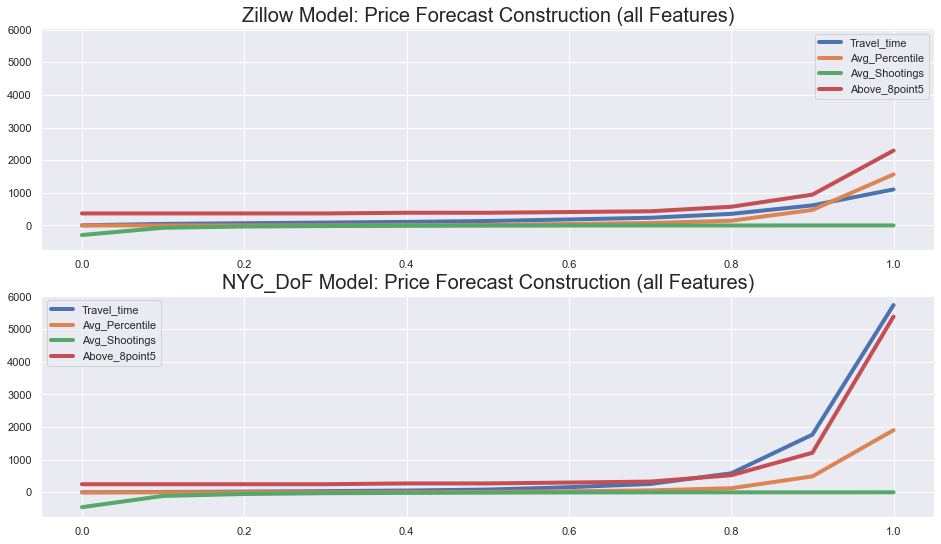

In [187]:
# Visualize All Features:  (add Log Scale?)
fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(16, 9), sharey=True)
ax1.plot(zillow_forecast_df[['Travel_time',  'Avg_Percentile', 'Avg_Shootings', 'Above_8point5']], #.iloc[1:-1],
         linewidth=4) # , ax=ax1
#(zillow_forecast_df[['Travel_time',  'Avg_Percentile', 'Avg_Shootings', 'Above_8point5']] #.iloc[1:-1]
# .plot(linewidth=4, ax=ax1));  # cmap=sns.color_palette("viridis", as_cmap=True)
ax1.set_title("Zillow Model: Price Forecast Construction (all Features)", fontsize=20);
ax1.legend(['Travel_time',  'Avg_Percentile', 'Avg_Shootings', 'Above_8point5'])
ax2.plot(nyc_dof_forecast_df[['Travel_time',  'Avg_Percentile', 'Avg_Shootings', 'Above_8point5']], #.iloc[1:-1]
         linewidth=4) # ax=ax2
#(nyc_dof_forecast_df[['Travel_time',  'Avg_Percentile', 'Avg_Shootings', 'Above_8point5']] #.iloc[1:-1]
# .plot(linewidth=4, ax=ax2));  # cmap=sns.color_palette("viridis", as_cmap=True)
ax2.set_title("NYC_DoF Model: Price Forecast Construction (all Features)", fontsize=20);
ax2.legend(['Travel_time',  'Avg_Percentile', 'Avg_Shootings', 'Above_8point5']);

In [86]:
# Discussion: 
# Second, its important to note that the Zillow model leans on the number of restaurants to build the high-end
# model of prices, and even school quality excees the value generted from commute time. 
# Meanwhile, the NYC DoF model leans most heavily on the commute data. Recall that the commute data and 
# restaurants data were highly correlated at about 70%. The Restaurant feature was second most prominent. 

In [87]:
# Discussion: 
# First, the NYC DoF data scales up much more for manhattan prices 
# I believe the NYC DoF data is more extreme at the high-end because it is biased towards 
# brownstones in manhattan. The parameter is One Family Residences. 
# The Zillow data includes Condo's and Co-ops
# NYC DoF provide a seperate Condo and Co-op data series in the more detailed database,
# which also includes two measures of sq.ft. as well as the year the building was built.
# However, this database was incredibly messsy, with outliers and seemingly erroneous data,
# so I avoided using it on the initial construction of the analysis.
# It would certainly be interesting to revisit, esp. with the consultation of DoF staff

In [185]:

"""
(forecast_proportions_df.set_index('Title', append=True)
 .sort_index(ascending=False)
 [['Travel_time','Avg_Percentile','Avg_Shootings','Above_8point5','Intercept','Forecast']]
 .head())
"""

Travel_time  Avg_Percentile  Avg_Shootings  \
Percentiles Title                                                 
1.0         Zillow        1104.0          1564.0           -0.0   
            NYC_DoF       5738.0          1905.0           -0.0   
0.9         Zillow         615.0           475.0           -0.0   
            NYC_DoF       1766.0           488.0           -1.0   
0.8         Zillow         355.0           144.0           -1.0   

                     Above_8point5  Intercept  Forecast  
Percentiles Title                                        
1.0         Zillow          2294.0        0.0    4962.0  
            NYC_DoF         5386.0       85.0   13114.0  
0.9         Zillow           944.0        0.0    2034.0  
            NYC_DoF         1211.0       85.0    3549.0  
0.8         Zillow           573.0        0.0    1071.0

In [188]:
# Translating parameters into useful information about the tradeoff btw/price and features/amenities
# How much can you save on price by living 10minutes further from work (midtown manhattan)?
# How much more do you pay for a house in a neighborood with a school in the 90th percentile vs. 80th?
# How badly does each shooting incident negatively impact home prices in the neighborhood? 
# What is the value uplift of having a desirability restaurant in the neighborhood? 

# Importantly, how can you optimize for price and features given your individual preferences, and the prices
# implied by the model 

In [190]:
# Slope, Interpret Parameters:

decile_comparison_dict = {'90_80': [0.9, 0.8], '80_70': [0.8, 0.7],
                         '70_60': [0.7, 0.6], '60_50': [0.6, 0.5]}

def decile_comparison(df, decile_comparison_dict):
    param_df = pd.DataFrame()
    for decile_comparison in decile_comparison_dict.keys():
        _start = decile_comparison_dict[decile_comparison][0]
        _end = decile_comparison_dict[decile_comparison][1]
        param_df = round(param_df.append((df.loc[_start] - df.loc[_end]).rename(decile_comparison)), 2)
    param_df.index = param_df.index.rename('Percentiles')
    return param_df


In [191]:
# Forecast change from deciles: for the Zillow model 
column_order = ['Travel_time',  'Avg_Percentile', 'Avg_Shootings', 'Above_8point5', 'Forecast']
zillow_decile_comparison_df = decile_comparison(zillow_forecast_df, decile_comparison_dict)
zillow_decile_comparison_df = zillow_decile_comparison_df[column_order]

zillow_decile_comparison_df

,Travel_time,Avg_Percentile,Avg_Shootings,Above_8point5,Forecast
Percentiles,,,,,
90_80,260.0,331.0,1.0,371.0,963.0
80_70,120.0,69.0,0.0,139.0,328.0
70_60,51.0,31.0,2.0,23.0,107.0
60_50,48.0,27.0,3.0,22.0,100.0


In [192]:
# Add the Feature Change:

feature_decile_comparison_df_df = decile_comparison(feature_percentiles_df, decile_comparison_dict)[column_order[:-1]]
zillow_decile_comparison_df['Title'] = 'Real Estate Price Change'
feature_decile_comparison_df_df['Title'] = 'Feature Change'
feature_decile_comparison_df = (zillow_decile_comparison_df.append(feature_decile_comparison_df_df)
                                .set_index('Title', append=True).sort_index(ascending=False))
# feature_decile_comparison_df.head()


Travel_time  Avg_Percentile  \
Percentiles Title                                                   
90_80       Real Estate Price Change       260.00          331.00   
            Feature Change                 -12.71            0.09   
80_70       Real Estate Price Change       120.00           69.00   
            Feature Change                  -9.48            0.05   
70_60       Real Estate Price Change        51.00           31.00   

                                      Avg_Shootings  Above_8point5  Forecast  
Percentiles Title                                                             
90_80       Real Estate Price Change           1.00          371.0     963.0  
            Feature Change                    -0.07            9.0       NaN  
80_70       Real Estate Price Change           0.00          139.0     328.0  
            Feature Change                    -0.15            5.0       NaN  
70_60       Real Estate Price Change           2.00           23.0     107.0

In [193]:
# Add $/Units:

_level_0_df = pd.DataFrame()
for level in feature_decile_comparison_df.index.get_level_values('Percentiles').unique():
    _new_row = (feature_decile_comparison_df.loc[level, 'Real Estate Price Change']
                / np.abs(feature_decile_comparison_df.loc[level, 'Feature Change'])).apply(lambda x: round(x,1))
    _new_row['Avg_Percentile'] = round(_new_row['Avg_Percentile'] / 100, 1)
    _new_row['Title'] = '$/unit'
    _new_row.name = level
    _level_0_df = _level_0_df.append(_new_row)
# _level_0_df
feature_decile_comparison_df = feature_decile_comparison_df.append(_level_0_df.set_index('Title', append=True)).sort_index(ascending=False)

# And Avg. $/Unit
_average_dol_unit = _level_0_df.mean().apply(lambda x: round(x,1))
_average_dol_unit['Title'] = '$/unit'
_average_dol_unit.name = 'Average'
_average_dol_unit
feature_decile_comparison_df = feature_decile_comparison_df.append(_average_dol_unit.to_frame().T.set_index('Title', append=True))


In [194]:
feature_decile_comparison_df


Travel_time Avg_Percentile Avg_Shootings  \
Percentiles Title                                                               
90_80       Real Estate Price Change         260            331             1   
            Feature Change                -12.71           0.09         -0.07   
            $/unit                          20.5           36.8          14.3   
80_70       Real Estate Price Change         120             69             0   
            Feature Change                 -9.48           0.05         -0.15   
            $/unit                          12.7           13.8             0   
70_60       Real Estate Price Change          51             31             2   
            Feature Change                 -5.63           0.04         -0.32   
            $/unit                           9.1            7.8           6.2   
60_50       Real Estate Price Change          48             27             3   
            Feature Change                 -7.03           0.07         -0.68   
            $/unit                           6.8            3.9           4.4   
Average     $/unit                          12.3           15.6           6.2   

                                     Above_8point5 Forecast  
Percentiles Title                                            
90_80       Real Estate Price Change           371      963  
            Feature Change                       9      NaN  
            $/unit                            41.2      NaN  
80_70       Real Estate Price Change           139      328  
            Feature Change                       5      NaN  
            $/unit                            27.8      NaN  
70_60       Real Estate Price Change            23      107  
            Feature Change                       1      NaN  
            $/unit                              23      NaN  
60_50       Real Estate Price Change            22      100  
            Feature Change                       1      NaN  
            $/unit                              22      NaN  
Average     $/unit                            28.5      NaN

In [94]:
# This table helps to visualize how changes in the fundamental features impact the real estate price forecast
# This is for the Zillow data, which is less extreme at the high-end: $5mm homes vs. +$15mm homes

# Overall, saving commute time costs $12k per 1 minute. 
# The model is exponential, so it's more at the high-end ($20k/minute) and less at the low end ($7k). This 
# makes sense, the difference between in a 10 minute and 20 minute commute on property values is more than 
# the impact of a commute that is 70 minutes instead of 60 minutes. It's non-linear. 
# Each 1 percentile better the neighborhoods schools are, raises prices by $16k
# A shooting incident in the neighborhood lowers single-family residence prices by $6k
# Each 8.5+ rated restaurant in a neighborhood raises property values by nearly $30k 
# (Neighborhoods should really compete for top chefs with incentives!)

# For Example: buying a $1mm home (80th percentile) instead of a $2.0mm home (90th percentile):
# * Implies a longer commute time of 13 minutes (80th vs. 90th percentile of commute times) to 33 minutes,
# which saves $260k on the price
# * Implies school quality declines by 9 percentiles, from 0.86 to 0.77, which saves $331k
# * There is no change in neighborhood safety - sill essencially 0 shooting incidents/yr
# * Implies 11 fewer restaurants to 8 restaurants that are within walking distance (<0.5-miles) 
# and rated 8.5 or above on ForeSquare. This saves $371k 

# This helps to visualize what the trade-off is between neighborhood ammenities and price. 


In [200]:
(zillow_forecast_df[['Travel_time','Avg_Percentile','Avg_Shootings',
                     'Above_8point5','Intercept','Forecast']].head())


,Travel_time,Avg_Percentile,Avg_Shootings,Above_8point5,Intercept,Forecast
Percentiles,,,,,,
1.0,1104.0,1564.0,-0.0,2294.0,0.0,4962.0
0.9,615.0,475.0,-0.0,944.0,0.0,2034.0
0.8,355.0,144.0,-1.0,573.0,0.0,1071.0
0.7,235.0,75.0,-1.0,434.0,0.0,743.0
0.6,184.0,44.0,-3.0,411.0,0.0,636.0


In [199]:
feature_percentiles_df.head()

,Travel_time,Avg_Percentile,Avg_Shootings,Above_8point5
Percentiles,,,,
1.0,6.75,0.95,0.00,33.0
0.9,20.25,0.86,0.07,17.0
0.8,32.96,0.77,0.14,8.0
0.7,42.44,0.72,0.29,3.0
0.6,48.07,0.68,0.61,2.0


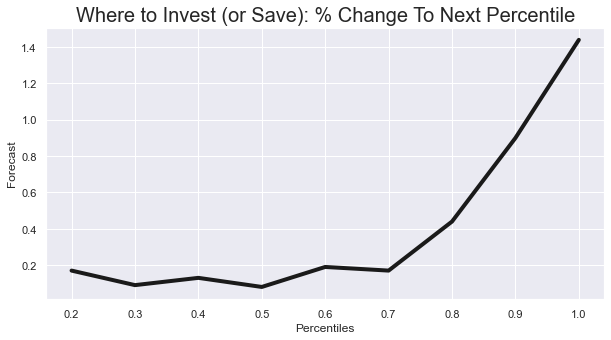

In [205]:
# The Forecast will also be an exponential curve - as the sum of different exponential functions
# The belly of the Forecast curve will provide the greatest % upside in real estate prices - where is this? 

forecast_curve_series = zillow_forecast_df['Forecast'].sort_values(ascending=True).pct_change().apply(lambda x: round(x,2))
forecast_curve_df = (zillow_forecast_df['Forecast'].to_frame(name='Price_Forecast')
                     .join(forecast_curve_series.to_frame(name='Percent_Change')))
#forecast_curve_series.plot(figsize=(10,5));
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=forecast_curve_series.iloc[2:], linewidth=4, color=u'k',
            markers=True, markersize=10);  
# .iloc[2:-1], lineplot, 
plt.title("Where to Invest (or Save): % Change To Next Percentile", fontsize=20);

In [206]:
# The appreciation happens from 70% and above
# Below the 70th percentile, changes from one decile to the next is only 10%-20% 
forecast_curve_df

,Price_Forecast,Percent_Change
Percentiles,,
1.0,4962.0,1.44
0.9,2034.0,0.90
0.8,1071.0,0.44
0.7,743.0,0.17
0.6,636.0,0.19
0.5,536.0,0.08
0.4,496.0,0.13
0.3,440.0,0.09
0.2,404.0,0.17


In [ ]:
# Model Parameter Confidence Interval: 

# Use the Covariance of the parameters
# pcov 2-D array
# The estimated covariance of popt. The diagonals provide the variance of the parameter estimate. 
# To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov)).



In [ ]:
# Let's fill in the values for the neighborhoods that had missing feature values, 
# and were dropped above to run the regression

# We are going to use the multinomial model built above to produce forecasts for all neighborhoods,
# as we did above, except we are now going to include the neighborhoods that had missing feature values


In [207]:
# Fill Missing Values:

repair_missing_df = compare_zillow_df.join(single_route_df.set_index(['Borough', 'Neighborhood'])['Travel_time'])
repair_missing_df = repair_missing_df.join(final_school_percentile_avg_df.set_index(['Borough', 'Neighborhood'])['Avg_Percentile'])
repair_missing_df = repair_missing_df.join(nyc_shootings_avg_df.set_index(['Borough','Neighborhood']))
repair_missing_df = repair_missing_df.join(neighborhood_quality_df['Above_8point5'])

repair_missing_df['Avg_Shootings'] = repair_missing_df['Avg_Shootings'].fillna(0)


In [210]:
# Missing PLG?

# repair_missing_df.loc['Brooklyn', 'Prospect Lefferts Gardens']
# repair_missing_df.loc['Manhattan', 'Washington Heights']


In [98]:
# Delete:
"""
# Fill Missing Values:

# Build multi_nomial_anlysis df
# Prior, Left Join:
#repair_missing_df = single_family_avg_df.join((growth_zillow_2005_2019_df['Avg_Price_2005_2019'] / 1000)
#                                              .apply(lambda x: round(x, 0)))

# New Outer Join:
repair_missing_df = single_family_avg_df.join((growth_zillow_2005_2019_df['Avg_Price_2005_2019'] / 1000)
                                              .apply(lambda x: round(x, 0)), how='outer')

repair_missing_df = repair_missing_df.rename(columns={'Avg_Price': 'NYC_DoF', 
                                                      'Avg_Price_2005_2019': 'Zillow'})

repair_missing_df = repair_missing_df.join(single_route_df.set_index(['Borough', 'Neighborhood'])['Travel_time'])
repair_missing_df = repair_missing_df.join(final_school_percentile_avg_df.set_index(['Borough', 'Neighborhood'])['Avg_Percentile'])
repair_missing_df = repair_missing_df.join(nyc_shootings_avg_df.set_index(['Borough','Neighborhood']))
repair_missing_df = repair_missing_df.join(neighborhood_quality_df['Above_8point5'])

repair_missing_df['Avg_Shootings'] = repair_missing_df['Avg_Shootings'].fillna(0)
"""

In [211]:
# Missing Values: Commute Time

repair_missing_df[repair_missing_df['Travel_time'].isna()]

,,NUMBER OF SALES,NYC_DoF,Zillow,Travel_time,Avg_Percentile,Avg_Shootings,Above_8point5
Borough,Neighborhood,,,,,,,
Queens,Breezy Point,161.0,487.0,623.0,NaN,0.609236,0.0,0.0


In [212]:

repair_missing_df.loc[('Queens', 'Belle Harbor')].to_frame().T

,,NUMBER OF SALES,NYC_DoF,Zillow,Travel_time,Avg_Percentile,Avg_Shootings,Above_8point5
Queens,Belle Harbor,413.0,811.0,856.0,96.866667,0.609236,0.071429,1.0


In [213]:
# Queens, Breezy Point, Travel Time: Use +10% more than next-door Neighborhood Belle Harbor:
_missing_neighborhood = repair_missing_df[repair_missing_df['Travel_time'].isna()].index
# Use nearby Belle Harbor
repair_missing_df.loc[_missing_neighborhood, 'Travel_time'] = (repair_missing_df
                                                               .loc[('Queens', 'Belle Harbor')]
                                                               ['Travel_time'] * 1.1)

repair_missing_df.loc[_missing_neighborhood]


,,NUMBER OF SALES,NYC_DoF,Zillow,Travel_time,Avg_Percentile,Avg_Shootings,Above_8point5
Borough,Neighborhood,,,,,,,
Queens,Breezy Point,161.0,487.0,623.0,106.553333,0.609236,0.0,0.0


In [214]:
# Missing Values: School Quality

repair_missing_df[repair_missing_df['Avg_Percentile'].isna()]


NUMBER OF SALES  NYC_DoF  Zillow  Travel_time  \
Borough   Neighborhood                                                     
Manhattan Midtown                      NaN      NaN  1239.0     4.833333   
          Midtown South                1.0   1950.0   877.0     4.066667   
          Stuyvesant Town              6.0   3596.0     NaN    31.983333   

                           Avg_Percentile  Avg_Shootings  Above_8point5  
Borough   Neighborhood                                                   
Manhattan Midtown                     NaN       1.071429           24.0  
          Midtown South               NaN       1.500000           27.0  
          Stuyvesant Town             NaN       0.428571            9.0

In [215]:
# 'Midtown': 'Flatiron', 'Chelsea', 'Murray Hill', 'Sutton Place', 'Turtle Bay'
new_school_percentile = np.mean([repair_missing_df.loc[('Manhattan','Flatiron')]['Avg_Percentile'],
                                 repair_missing_df.loc[('Manhattan','Chelsea')]['Avg_Percentile'],
                                 repair_missing_df.loc[('Manhattan','Murray Hill')]['Avg_Percentile'],
                                 repair_missing_df.loc[('Manhattan','Sutton Place')]['Avg_Percentile'],
                                 repair_missing_df.loc[('Manhattan','Turtle Bay')]['Avg_Percentile']
                                ])
repair_missing_df.loc[('Manhattan', 'Midtown'), 'Avg_Percentile'] = new_school_percentile


In [216]:
# 'Midtown South': 'Flatiron', 'Chelsea', 'Murray Hill'
new_school_percentile = np.mean([repair_missing_df.loc[('Manhattan','Flatiron')]['Avg_Percentile'],
                                 repair_missing_df.loc[('Manhattan','Chelsea')]['Avg_Percentile'],
                                 repair_missing_df.loc[('Manhattan','Murray Hill')]['Avg_Percentile']
                                ])
repair_missing_df.loc[('Manhattan', 'Midtown South'), 'Avg_Percentile'] = new_school_percentile


In [217]:
# 'Stuyvesant Town': 'Gramercy', 'East Village'
new_school_percentile = np.mean([repair_missing_df.loc[('Manhattan','Gramercy')]['Avg_Percentile'],
                                 repair_missing_df.loc[('Manhattan','East Village')]['Avg_Percentile']
                                ])
repair_missing_df.loc[('Manhattan', 'Stuyvesant Town'), 'Avg_Percentile'] = new_school_percentile


In [362]:
# sales_summary_df[sales_summary_df['Neighborhood'] == 'Hudson Yards']  # 02 TWO FAMILY HOMES: 6,100,000

,NEIGHBORHOOD,TYPE OF HOME,NUMBER OF SALES,LOWEST SALE PRICE,AVERAGE SALE PRICE,MEDIAN SALE PRICE,HIGHEST SALE PRICE,Year,Borough,Neighborhood,Type_of_Home
22,Javits Center,02 TWO FAMILY HOMES,1,6100000,6100000.0,6100000.0,6100000,2017,Manhattan,Hudson Yards,02 TWO FAMILY HOMES


In [219]:
# repair_missing_df[repair_missing_df['Avg_Percentile'].isna()]

In [220]:
# Missing Values: FourSquare Restaurants

repair_missing_df[repair_missing_df['Above_8point5'].isna()]


,,NUMBER OF SALES,NYC_DoF,Zillow,Travel_time,Avg_Percentile,Avg_Shootings,Above_8point5
Borough,Neighborhood,,,,,,,
Staten_Island,Todt Hill,331.0,1443.0,956.0,103.316667,0.649159,0.071429,NaN


In [221]:
# 'Todt Hill': 'Emerson Hill', 'Willowbrook', 'Dongan Hills'
new_restaurant_avg = np.mean([repair_missing_df.loc[('Staten_Island','Emerson Hill')]['Above_8point5'],
                              repair_missing_df.loc[('Staten_Island','Willowbrook')]['Above_8point5'],
                              repair_missing_df.loc[('Staten_Island','Dongan Hills')]['Above_8point5']
                             ])
repair_missing_df.loc[('Staten_Island', 'Todt Hill'), 'Above_8point5'] = round(new_restaurant_avg,0)


In [223]:
# repair_missing_df[repair_missing_df['Above_8point5'].isna()]

In [485]:
# Multinomial Regression:
forecast_df = repair_missing_df.copy()
for label in ['Zillow', 'NYC_DoF']:
    x1 = forecast_df['Travel_time'].squeeze().to_numpy()
    x2 = forecast_df['Avg_Percentile'].squeeze().to_numpy()
    x3 = forecast_df['Avg_Shootings'].squeeze().to_numpy()
    x4 = forecast_df['Above_8point5'].squeeze().to_numpy()
    X = [x1, x2, x3, x4]
    
    params_multinomial_df = regr_summary_df[regr_summary_df['Features'] == 'Multinomial']
    params_list = params_multinomial_df[params_multinomial_df['Labels'] == label]['Coefficients'].values[0]
    #a, b, c, d, e, f, g = params_list
    # Intercept:
    h = params_multinomial_df[params_multinomial_df['Labels'] == label]['Intercept'].values[0]
    
    y_pred = multi_exp_func(X, *params_list, h)
    
    forecast_df[f'{label}_Forecast'] = [round(x,0) for x in y_pred]  # y_pred

In [486]:
forecast_df

NUMBER OF SALES  NYC_DoF  Zillow  Travel_time  \
Borough       Neighborhood                                                   
Bronx         Allerton                   1.0    245.0     NaN    57.000000   
              Baychester              1348.0    358.0   385.0    62.750000   
              Bedford Park             233.0    488.0   373.0    39.916667   
              Belmont                  116.0    346.0   401.0    44.083333   
              Bronxdale                764.0    378.0     NaN    49.316667   
...                                      ...      ...     ...          ...   
Staten_Island Travis                   665.0    398.0   408.0    68.433333   
              West Brighton              NaN      NaN   451.0    77.483333   
              Westerleigh             1295.0    450.0   467.0    74.283333   
              Willowbrook             1026.0    488.0   452.0    62.866667   
              Woodrow                  936.0    498.0   578.0    74.300000   

                             Avg_Percentile  Avg_Shootings  Above_8point5  \
Borough       Neighborhood                                                  
Bronx         Allerton             0.373751       6.285714            1.0   
              Baychester           0.312059       3.500000            1.0   
              Bedford Park         0.203534      11.642857            0.0   
              Belmont              0.257055      13.000000           11.0   
              Bronxdale            0.313201       3.642857            4.0   
...                                     ...            ...            ...   
Staten_Island Travis               0.612509       0.071429            0.0   
              West Brighton        0.342709       2.428571            0.0   
              Westerleigh          0.740048       0.285714            0.0   
              Willowbrook          0.612509       0.285714            0.0   
              Woodrow              0.784308       0.142857            0.0   

                             Zillow_Forecast  NYC_DoF_Forecast  
Borough       Neighborhood                                      
Bronx         Allerton                 484.0             383.0  
              Baychester               470.0             375.0  
              Bedford Park             574.0             564.0  
              Belmont                  834.0             901.0  
              Bronxdale                617.0             558.0  
...                                      ...               ...  
Staten_Island Travis                   462.0             371.0  
              West Brighton            408.0             328.0  
              Westerleigh              523.0             427.0  
              Willowbrook              481.0             386.0  
              Woodrow                  601.0             504.0  

[255 rows x 9 columns]

In [226]:
regr_summary_df.tail()

,Labels,Features,R-sq Score,Coefficients,Intercept,Model
1,NYC_DoF,Above_8point5,0.589,188.048,323.033,Linear_regression
16,Zillow,Above_8point5,0.458,"[-18473.774924621222, -0.004668910436842224]",18950.9,Exp_regression
17,NYC_DoF,Above_8point5,0.62,"[1679.2639147306284, 0.053322450738851605]",-1202.63,Exp_regression
20,Zillow,Multinomial,0.573,"[1479.6342126363804, -0.043341850323213665, 0....",1.33659e-26,Multinomial_regression
21,NYC_DoF,Multinomial,0.799,"[10342.504185998781, -0.08728480251675348, 0.0...",85.3089,Multinomial_regression


In [122]:
# forecast_df[forecast_df['NYC_DoF'].notna()]['NYC_DoF'].to_numpy()
# forecast_df[forecast_df['NYC_DoF'].notna()]['NYC_DoF_Forecast'].to_numpy()
# [['NYC_DoF','NYC_DoF_Forecast']].squeeze().to_numpy()

In [227]:
# Calc R-squared,
# with the few, new neighborhoods that were missing feature values (for both Zillow and NYC_DoF)

r_sq_dict = {'NYC_DoF': None,
             'Zillow': None}

for dataset in r_sq_dict.keys():
    _df = forecast_df[forecast_df[dataset].notna()]
    # forecast_df[forecast_df['Zillow'].notna()]
    y = _df[dataset].to_numpy()
    y_pred = _df[f'{dataset}_Forecast'].to_numpy()
    r_sq_dict[dataset] = round(r2_score(y, y_pred), 3)

r_sq_df = pd.DataFrame.from_dict(r_sq_dict, orient='index', columns=['With_New_Neighborhoods']).T
r_sq_df = (r_sq_df.append(regr_summary_df[regr_summary_df['Features'] == 'Multinomial']
                          .set_index('Labels')['R-sq Score'].rename('Original_Neighborhoods')))
r_sq_df

,NYC_DoF,Zillow
With_New_Neighborhoods,0.687,0.535
Original_Neighborhoods,0.799,0.573


In [228]:
# Prior: With_New_Neighborhoods	0.627	0.530

In [ ]:
# Analyze Results: Develop Conclusions

In [487]:
# Upside (+) /Downside (-) Column:
forecast_df['NYC_DoF_Upside'] = round(forecast_df['NYC_DoF_Forecast'] - forecast_df['NYC_DoF'],0)
forecast_df['Zillow_Upside'] = round(forecast_df['Zillow_Forecast'] - forecast_df['Zillow'],0)

# % Upside:
forecast_df['NYC_DoF_%_Upside'] = round(forecast_df['NYC_DoF_Upside'] / forecast_df['NYC_DoF'],2)
forecast_df['Zillow_%_Upside'] = round(forecast_df['Zillow_Upside'] / forecast_df['Zillow'],2)

# Decile Column:
forecast_df['Decile'] = forecast_df['Zillow_Forecast'].rank(pct=True).apply(lambda x: round(x,2))
#forecast_df['NYC_DoF_Forecast'].rank(pct=True).apply(lambda x: round(x,2))


In [ ]:
# Check/Fix:  Prospect Park South should not be as low as the 66th percentile





In [488]:
# Round Values

round_dict = {0: ['NUMBER OF SALES', 'NYC_DoF', 'Zillow', 'Above_8point5', 'Zillow_Forecast', 
                'NYC_DoF_Forecast', 'NYC_DoF_Upside', 'Zillow_Upside'],
              1: ['Travel_time', 'Avg_Shootings'],
              2: ['Avg_Percentile', 'NYC_DoF_%_Upside', 'Zillow_%_Upside', 'Decile']}

for digits in round_dict.keys():
    _columns = round_dict[digits]
    forecast_df[_columns] = forecast_df[_columns].apply(lambda x: round(x,digits))

In [489]:
forecast_df

NUMBER OF SALES  NYC_DoF  Zillow  Travel_time  \
Borough       Neighborhood                                                   
Bronx         Allerton                   1.0    245.0     NaN         57.0   
              Baychester              1348.0    358.0   385.0         62.8   
              Bedford Park             233.0    488.0   373.0         39.9   
              Belmont                  116.0    346.0   401.0         44.1   
              Bronxdale                764.0    378.0     NaN         49.3   
...                                      ...      ...     ...          ...   
Staten_Island Travis                   665.0    398.0   408.0         68.4   
              West Brighton              NaN      NaN   451.0         77.5   
              Westerleigh             1295.0    450.0   467.0         74.3   
              Willowbrook             1026.0    488.0   452.0         62.9   
              Woodrow                  936.0    498.0   578.0         74.3   

                             Avg_Percentile  Avg_Shootings  Above_8point5  \
Borough       Neighborhood                                                  
Bronx         Allerton                 0.37            6.3            1.0   
              Baychester               0.31            3.5            1.0   
              Bedford Park             0.20           11.6            0.0   
              Belmont                  0.26           13.0           11.0   
              Bronxdale                0.31            3.6            4.0   
...                                     ...            ...            ...   
Staten_Island Travis                   0.61            0.1            0.0   
              West Brighton            0.34            2.4            0.0   
              Westerleigh              0.74            0.3            0.0   
              Willowbrook              0.61            0.3            0.0   
              Woodrow                  0.78            0.1            0.0   

                             Zillow_Forecast  NYC_DoF_Forecast  \
Borough       Neighborhood                                       
Bronx         Allerton                 484.0             383.0   
              Baychester               470.0             375.0   
              Bedford Park             574.0             564.0   
              Belmont                  834.0             901.0   
              Bronxdale                617.0             558.0   
...                                      ...               ...   
Staten_Island Travis                   462.0             371.0   
              West Brighton            408.0             328.0   
              Westerleigh              523.0             427.0   
              Willowbrook              481.0             386.0   
              Woodrow                  601.0             504.0   

                             NYC_DoF_Upside  Zillow_Upside  NYC_DoF_%_Upside  \
Borough       Neighborhood                                                     
Bronx         Allerton                138.0            NaN              0.56   
              Baychester               17.0           85.0              0.05   
              Bedford Park             76.0          201.0              0.16   
              Belmont                 555.0          433.0              1.60   
              Bronxdale               180.0            NaN              0.48   
...                                     ...            ...               ...   
Staten_Island Travis                  -27.0           54.0             -0.07   
              West Brighton             NaN          -43.0               NaN   
              Westerleigh             -23.0           56.0             -0.05   
              Willowbrook            -102.0           29.0             -0.21   
              Woodrow                   6.0           23.0              0.01   

                             Zillow_%_Upside  Decile  
Borough       Neighborhood                            
Br

In [293]:
# Add Momentum Indicator: 
# Since 2005, how much have prices been rising or falling per year on average (%)
# Plus (+) how has the school quality changed in terms of percentile rank (wieighted by 1/2)
# Example: A Neighborhood growing at 10% per year, with schools improving from the 50th percentile to 70th
# would have a momentum value of +20(%)
# A neighborhood that saw 20% growth in prices, but with school quality declining from 70th percentile to 60th
# would have a momentum value of +15(%)

single_family_momentum_df = sales_summary_df.copy()
single_family_momentum_df = single_family_momentum_df[single_family_momentum_df['Type_of_Home'] == '01 ONE FAMILY HOMES']
single_family_momentum_df['Average_Sales_Price'] = single_family_momentum_df['AVERAGE SALE PRICE'] / 1000 # in $000's now

price_momentum_pivot_df = pd.pivot_table(single_family_momentum_df, values='Average_Sales_Price',
                                         index=['Borough', 'Neighborhood'], columns='Year',
                                         aggfunc='mean', fill_value=np.nan)
#number_sales_details_df = pd.pivot_table(single_family_momentum_df, values='NUMBER OF SALES', index=['Borough', 'Neighborhood'], columns='Year', aggfunc='sum', fill_value=np.nan)
# number_sales_details_df

In [294]:
price_momentum_pivot_df

Year                            2005      2006      2007      2008     2009  \
Borough       Neighborhood                                                    
Bronx         Allerton           NaN       NaN  245.0000       NaN      NaN   
              Baychester    331.4880  382.6630  384.6980  369.5950  340.465   
              Bedford Park  359.0260  413.9340  403.0750  359.1310  319.987   
              Belmont       343.9475  401.8175  377.9285  380.0265  345.752   
              Bronxdale     374.0370  393.8360  394.4610  363.9350  319.013   
...                              ...       ...       ...       ...      ...   
Staten_Island Tottenville   544.9000  540.4890  563.6650  488.3970  503.668   
              Travis        384.7215  383.3725  506.3830  395.8930  340.662   
              Westerleigh   413.0690  451.7600  439.1250  413.0960  393.075   
              Willowbrook   447.9910  452.5870  450.3960  439.1240  394.640   
              Woodrow       455.9400  457.2370  463.8200  435.7760  457.820   

Year                           2010     2011     2012      2013     2014  \
Borough       Neighborhood                                                 
Bronx         Allerton          NaN      NaN      NaN       NaN      NaN   
              Baychester    293.498  296.449  319.730  298.0080  323.235   
              Bedford Park  326.079  343.521  562.630  357.1250  307.882   
              Belmont       242.153  287.875  288.938  321.5870  343.333   
              Bronxdale     309.399  289.590  309.111  305.5030  347.971   
...                             ...      ...      ...       ...      ...   
Staten_Island Tottenville   540.111  549.913  556.476  480.8580  498.841   
              Travis        336.151  357.216  376.957  355.0235  394.346   
              Westerleigh   390.144  409.647  390.027  376.0680  412.527   
              Willowbrook   401.813  408.455  436.548  414.5480  449.610   
              Woodrow       424.561  595.068  548.397  431.0970  418.395   

Year                           2015     2016     2017     2018         2019  
Borough       Neighborhood                                                   
Bronx         Allerton          NaN      NaN      NaN      NaN          NaN  
              Baychester    346.971  357.620  372.155  399.321   415.784400  
              Bedford Park  528.200  334.611  395.725  649.920  1305.639190  
              Belmont       372.083  253.760  352.604  305.596   432.458333  
              Bronxdale     335.535  355.666  417.873  487.383   454.455646  
...                             ...      ...      ...      ...          ...  
Staten_Island Tottenville   496.199  542.836  743.157  662.133   700.312214  
              Travis        385.617  369.044  389.253  492.585   444.590469  
              Westerleigh   424.957  486.699  522.117  548.672   552.775060  
              Willowbrook   460.412  536.791  588.270  614.271   670.817875  
              Woodrow       448.008  477.576  532.925  584.056   642.446855  

[197 rows x 15 columns]

In [311]:
def price_trajectory(series):
    _regression_values = series.dropna().values
    if len(_regression_values) >= 3:
        return np.polyfit(np.arange(len(_regression_values)), _regression_values, 1)[0]
    else:
        return np.nan  # 0
    
price_cagr_df = price_momentum_pivot_df.copy()
price_cagr_df['Yearly_Increase'] = price_cagr_df.T.apply(lambda x: price_trajectory(x))
price_cagr_df = price_cagr_df.sort_values(by='Yearly_Increase', ascending=False)

# Use Percent-Change: 
price_cagr_df = price_cagr_df.join(single_family_avg_df['Avg_Price'], how='left').round(0)  # Use weighted avg
price_cagr_df['NYC_DoF_CAGR'] = price_cagr_df['Yearly_Increase'] / price_cagr_df['Avg_Price']
price_cagr_df = price_cagr_df[['Avg_Price','Yearly_Increase','NYC_DoF_CAGR']].sort_values('NYC_DoF_CAGR', ascending=False)


In [312]:
price_cagr_df

Avg_Price  Yearly_Increase  NYC_DoF_CAGR
Borough       Neighborhood                                                
Staten_Island Bloomfield             5233.0           6700.0      1.280336
Manhattan     Stuyvesant Town        3596.0           1060.0      0.294772
              Financial District     3002.0            769.0      0.256163
              Manhattan Valley       2689.0            608.0      0.226106
              East Harlem            1872.0            269.0      0.143697
...                                     ...              ...           ...
              Clinton                3392.0              NaN           NaN
              Flatiron              12000.0              NaN           NaN
              Manhattanville         1530.0              NaN           NaN
              Midtown South          1950.0              NaN           NaN
Queens        Breezy Point            487.0              NaN           NaN

[197 rows x 3 columns]

In [313]:
# Drop NaN's:
price_cagr_df[price_cagr_df['NYC_DoF_CAGR'].isna()]

Avg_Price  Yearly_Increase  NYC_DoF_CAGR
Borough   Neighborhood                                            
Bronx     Allerton            245.0              NaN           NaN
Manhattan Civic Center       5450.0              NaN           NaN
          Clinton            3392.0              NaN           NaN
          Flatiron          12000.0              NaN           NaN
          Manhattanville     1530.0              NaN           NaN
          Midtown South      1950.0              NaN           NaN
Queens    Breezy Point        487.0              NaN           NaN

In [314]:
price_cagr_df = price_cagr_df[price_cagr_df['NYC_DoF_CAGR'].notna()]

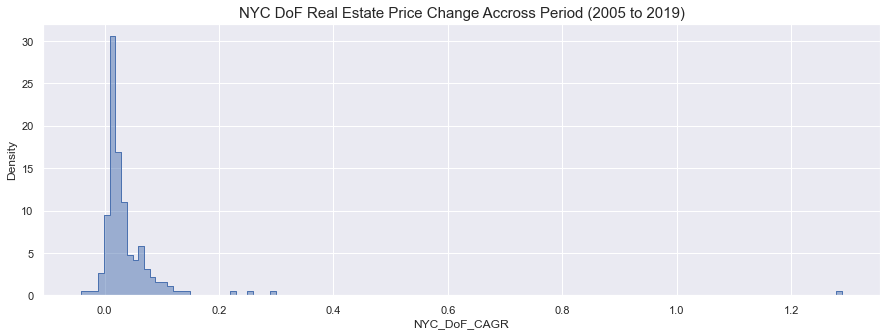

In [315]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data=price_cagr_df, x="NYC_DoF_CAGR", stat='density',
                  binwidth=0.01, alpha=0.5, element="step"); # color=u'b'
plt.title("NYC DoF Real Estate Price Change Accross Period (2005 to 2019)", fontsize=15);


In [316]:
# Outliers: 
price_cagr_df[:5]
# Bloomfield again. Let's drop it. 
# I'm going to leave the other outliers in place as-is

Avg_Price  Yearly_Increase  NYC_DoF_CAGR
Borough       Neighborhood                                                
Staten_Island Bloomfield             5233.0           6700.0      1.280336
Manhattan     Stuyvesant Town        3596.0           1060.0      0.294772
              Financial District     3002.0            769.0      0.256163
              Manhattan Valley       2689.0            608.0      0.226106
              East Harlem            1872.0            269.0      0.143697

In [317]:
price_cagr_df = price_cagr_df.drop(index=('Staten_Island', 'Bloomfield'), axis=0)
# Replace Outliers: with 20% ceiling?
# price_cagr_df.iloc[0]['%_Growth'] = 0.2
# price_cagr_df.iloc[1]['%_Growth'] = 0.2
# price_cagr_df.head()

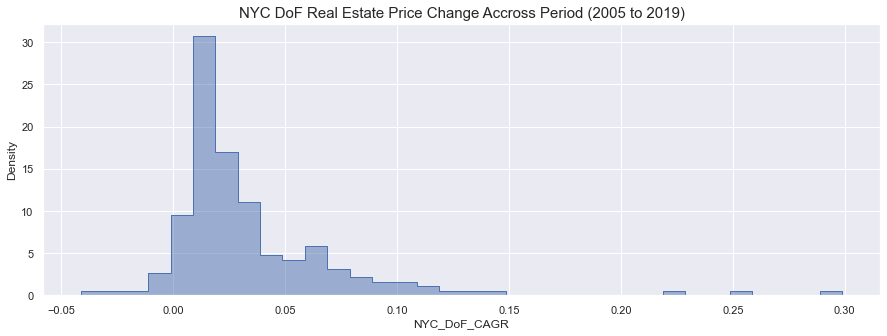

In [318]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data=price_cagr_df, x="NYC_DoF_CAGR", stat='density',
                  binwidth=0.01, alpha=0.5, element="step"); # color=u'b'
plt.title("NYC DoF Real Estate Price Change Accross Period (2005 to 2019)", fontsize=15);


In [512]:
# Zillow
momentum_df = price_cagr_df['NYC_DoF_CAGR'].to_frame().join(growth_zillow_2005_2019_df.rename(columns={'Growth_%_2005_2019': 'Zillow_CAGR'})['Zillow_CAGR'], how='outer')

# Education
final_math_trajectory_df = pd.read_csv('Neighborhood_School_Quality_Momentum.csv', index_col=[0,1])
final_math_trajectory_df = final_math_trajectory_df.rename(columns={'Trajectory_Updated': 'School_Rank_Change'})

# Ignore Crime, for now
# shootings_trajectory_df = pd.read_csv('NYC_Neighborhood_Shootings_Trajectory.csv')
# shootings_trajectory_df = (shootings_trajectory_df.rename(columns={'Name': 'Neighborhood'}).set_index(['Borough','Neighborhood']))
# shootings_trajectory_df['Shootings_Change_Rank'] = shootings_trajectory_df['Trajectory'].rank(pct=True).apply(lambda x: round(x,2))

momentum_df = momentum_df.join(final_math_trajectory_df['School_Rank_Change'], how='left')
momentum_df = (momentum_df * 100).round(2).sort_values('NYC_DoF_CAGR', ascending=False)

In [514]:
def momentum_indicator(row):
    _prices_row = row[['NYC_DoF_CAGR', 'Zillow_CAGR']]
    avg_growth = np.mean(_prices_row[_prices_row.notna()].values)
    _school_improvement = (0 if np.isnan(row['School_Rank_Change']) else row['School_Rank_Change'])
    momentum = avg_growth + (_school_improvement / 2) # _school_metric / 2 ?
    return momentum

momentum_df['Momentum_Metric'] = (momentum_df.apply(lambda x: momentum_indicator(x), axis=1))
momentum_df = momentum_df.sort_values('Momentum_Metric', ascending=False)


In [515]:
momentum_df

NYC_DoF_CAGR  Zillow_CAGR  School_Rank_Change  \
Borough   Neighborhood                                                        
Manhattan Stuyvesant Town            29.48          NaN                 NaN   
          Manhattan Valley           22.61          NaN                0.19   
          Financial District         25.62         1.78               -0.04   
Brooklyn  Starrett City              12.29          NaN               -3.74   
          Bedford Stuyvesant         10.96         7.87                0.67   
...                                    ...          ...                 ...   
Bronx     City Island                -1.89         0.04               -2.36   
          Hunts Point                -4.12        -0.46               -0.24   
Queens    Breezy Point                 NaN        -7.72                0.29   
          Roxbury                      NaN        -8.99                0.29   
Manhattan Battery Park City            NaN        -9.48               -0.04   

                              Momentum_Metric  
Borough   Neighborhood                         
Manhattan Stuyvesant Town              29.480  
          Manhattan Valley             22.705  
          Financial District           13.680  
Brooklyn  Starrett City                10.420  
          Bedford Stuyvesant            9.750  
...                                       ...  
Bronx     City Island                  -2.105  
          Hunts Point                  -2.410  
Queens    Breezy Point                 -7.575  
          Roxbury                      -8.845  
Manhattan Battery Park City            -9.500  

[252 rows x 4 columns]

In [516]:
forecast_w_momentum_df = forecast_df.join(momentum_df)


In [522]:
# Favorite Search
(forecast_w_momentum_df[(forecast_w_momentum_df['Travel_time'] >= 20) 
             & (forecast_w_momentum_df['Travel_time'] <= 45) 
             & (forecast_w_momentum_df['Avg_Percentile'] >= 0.75)]
 .sort_values('NYC_DoF_%_Upside', ascending=False).round(rev_round_dict).T)

# Gowanus looks incredibly similar to Park Slope, but has prices near $1.1mm vs. $2mm, 
# and the best momentum of the group
# In both neigborhoods, the commute time is 35min, schools are at the 76th percentile, 
# there are 15 restaurants, and about 1 shooting/year

# Cobble Hill is pricier than these two by a significant amount $2.5-$3.0mm, 
# albeit with better schools at +5 percentiles higher. Still, both models see prices 40% overvalued in Cobble
# Brooklyn Heights is simlarly over-priced but at a higher price-point $3.5-$4.0mm, but a 15min shorter commute


# Flushing is the favorite neighborhood, with over 100% upside. 
# Flushing looks simlary to Batter Park City in terms of schools near the top 10% 
# and with 10 highly-rated restaurants, but with a 12 minute longer commute time
# Meanwhile, Battery Park City is priced at $1.5mm and Flushing is priced at half that - $700k
# and Battery Park City has the worst momentum of the group - prices are declining sharply at -9%/yr per Zillow


Borough               Queens  Brooklyn       Queens   Brooklyn  \
Neighborhood        Flushing   Gowanus Forest Hills Park Slope   
NUMBER OF SALES     10322.00    76.000      2046.00    339.000   
NYC_DoF               684.00  1126.000      1023.00   2307.000   
Zillow                740.00  1186.000       952.00   1763.000   
Travel_time            37.40    35.600        36.70     32.800   
Avg_Percentile          0.88     0.760         0.81      0.760   
Avg_Shootings           4.30     0.800         0.90      0.400   
Above_8point5          10.00    15.000         7.00     15.000   
Zillow_Forecast      1551.00  1277.000      1089.00   1319.000   
NYC_DoF_Forecast     1763.00  1647.000      1208.00   1778.000   
NYC_DoF_Upside       1079.00   521.000       185.00   -529.000   
Zillow_Upside         811.00    91.000       137.00   -444.000   
NYC_DoF_%_Upside        1.58     0.460         0.18     -0.230   
Zillow_%_Upside         1.10     0.080         0.14     -0.250   
Decile                  0.87     0.830         0.78      0.840   
NYC_DoF_CAGR            3.36    10.750         3.81      4.850   
Zillow_CAGR             4.30     6.000         4.24      5.500   
School_Rank_Change     -0.44     1.220        -0.79      1.220   
Momentum_Metric         3.61     8.985         3.63      5.785   

Borough                                          Manhattan                    \
Neighborhood       Brooklyn Heights Cobble Hill    Tribeca Battery Park City   
NUMBER OF SALES             124.000       96.00     21.000               NaN   
NYC_DoF                    4361.000     2969.00  10137.000               NaN   
Zillow                     3536.000     2594.00   3543.000           1409.00   
Travel_time                  22.700       36.60     20.100             24.40   
Avg_Percentile                0.830        0.83      0.930              0.87   
Avg_Shootings                 0.300        1.30      0.200              0.00   
Above_8point5                17.000       15.00     23.000             10.00   
Zillow_Forecast            1796.000     1443.00   3121.000           1729.00   
NYC_DoF_Forecast           3006.000     1795.00   5382.000           2552.00   
NYC_DoF_Upside            -1355.000    -1174.00  -4755.000               NaN   
Zillow_Upside             -1740.000    -1151.00   -422.000            320.00   
NYC_DoF_%_Upside             -0.310       -0.40     -0.470               NaN   
Zillow_%_Upside              -0.490       -0.44     -0.120              0.23   
Decile                        0.890        0.85      0.980              0.89   
NYC_DoF_CAGR                  6.560        5.96      5.050               NaN   
Zillow_CAGR                   4.470        5.52      2.870             -9.48   
School_Rank_Change           -0.940       -0.94      0.170             -0.04   
Momentum_Metric               5.045        5.27      4.045             -9.50   

Borough                Queens                       
Neighborhood       Auburndale Forest Hills Gardens  
NUMBER OF SALES           NaN                  NaN  
NYC_DoF                   NaN                  NaN  
Zillow                675.000             1033.000  
Travel_time            42.900               40.800  
Avg_Percentile          0.760                0.810  
Avg_Shootings           0.100                0.200  
Above_8point5           1.000                7.000  
Zillow_Forecast       747.000             1043.000  
NYC_DoF_Forecast      711.000             1087.000  
NYC_DoF_Upside            NaN                  NaN  
Zillow_Upside          72.000               10.000  
NYC_DoF_%_Upside          NaN                  NaN  
Zillow_%_Upside         0.110                0.010  
Decile                  0.660                0.760  
NYC_DoF_CAGR              NaN                  NaN  
Zillow_CAGR             3.200                3.640  
School_Rank_Change     -1.910               -0.790  
Momentum_Metric         2.245                3.245

In [523]:
# Absolute most upside
forecast_w_momentum_df.sort_values('NYC_DoF_%_Upside', ascending=False).head(10).T

Borough                Manhattan           Queens            Brooklyn  \
Neighborhood       Midtown South Long Island City Woodside Greenpoint   
NUMBER OF SALES             1.00           118.00   409.00     93.000   
NYC_DoF                  1950.00           742.00   597.00   1044.000   
Zillow                    877.00              NaN   646.00   1137.000   
Travel_time                 4.10            14.80    20.90     29.900   
Avg_Percentile              0.80             0.52     0.73      0.620   
Avg_Shootings               1.50             0.80     2.00      1.600   
Above_8point5              27.00             5.00     3.00     26.000   
Zillow_Forecast          3086.00          1267.00  1102.00   1973.000   
NYC_DoF_Forecast        10595.00          3324.00  2126.00   3652.000   
NYC_DoF_Upside           8645.00          2582.00  1529.00   2608.000   
Zillow_Upside            2209.00              NaN   456.00    836.000   
NYC_DoF_%_Upside            4.43             3.48     2.56      2.500   
Zillow_%_Upside             2.52              NaN     0.71      0.740   
Decile                      0.97             0.83     0.79      0.900   
NYC_DoF_CAGR                 NaN             7.68     2.85      8.810   
Zillow_CAGR                 2.25              NaN     3.24      8.340   
School_Rank_Change           NaN            -0.40     0.45      0.320   
Momentum_Metric             2.25             7.48     3.27      8.735   

Borough                     Queens           Brooklyn    Bronx    Queens  \
Neighborhood       Oakland Gardens Sunnyside Bushwick  Belmont  Flushing   
NUMBER OF SALES           1386.000   260.000   286.00  116.000  10322.00   
NYC_DoF                    753.000   687.000   548.00  346.000    684.00   
Zillow                     786.000   721.000   651.00  401.000    740.00   
Travel_time                 80.700    24.900    34.50   44.100     37.40   
Avg_Percentile               0.950     0.700     0.39    0.260      0.88   
Avg_Shootings                0.100     0.400    29.10   13.000      4.30   
Above_8point5                1.000    10.000    16.00   11.000     10.00   
Zillow_Forecast           2032.000  1198.000  1086.00  834.000   1551.00   
NYC_DoF_Forecast          2318.000  1936.000  1480.00  901.000   1763.00   
NYC_DoF_Upside            1565.000  1249.000   932.00  555.000   1079.00   
Zillow_Upside             1246.000   477.000   435.00  433.000    811.00   
NYC_DoF_%_Upside             2.080     1.820     1.70    1.600      1.58   
Zillow_%_Upside              1.590     0.660     0.67    1.080      1.10   
Decile                       0.910     0.810     0.78    0.690      0.87   
NYC_DoF_CAGR                 2.390     4.950     8.21   -0.290      3.36   
Zillow_CAGR                  2.470     5.120     6.61    0.430      4.30   
School_Rank_Change          -0.750     0.940    -0.16   -3.410     -0.44   
Momentum_Metric              2.055     5.505     7.33   -1.635      3.61   

Borough                      
Neighborhood       Elmhurst  
NUMBER OF SALES     1163.00  
NYC_DoF              605.00  
Zillow               671.00  
Travel_time           32.10  
Avg_Percentile         0.60  
Avg_Shootings          4.60  
Above_8point5         13.00  
Zillow_Forecast     1117.00  
NYC_DoF_Forecast    1522.00  
NYC_DoF_Upside       917.00  
Zillow_Upside        446.00  
NYC_DoF_%_Upside       1.52  
Zillow_%_Upside        0.66  
Decile                 0.80  
NYC_DoF_CAGR           3.31  
Zillow_CAGR            3.45  
School_Rank_Change    -3.72  
Momentum_Metric        1.52

In [541]:
# Top Picks in each Borough: Move to the top of the analysis? 
forecast_w_momentum_df.loc['Manhattan', slice(None)].sort_values('NYC_DoF_%_Upside', ascending=False)

,NUMBER OF SALES,NYC_DoF,Zillow,Travel_time,Avg_Percentile,Avg_Shootings,Above_8point5,Zillow_Forecast,NYC_DoF_Forecast,NYC_DoF_Upside,Zillow_Upside,NYC_DoF_%_Upside,Zillow_%_Upside,Decile,NYC_DoF_CAGR,Zillow_CAGR,School_Rank_Change,Momentum_Metric
Neighborhood,,,,,,,,,,,,,,,,,,
Midtown South,1.0,1950.0,877.0,4.1,0.80,1.5,27.0,3086.0,10595.0,8645.0,2209.0,4.43,2.52,0.97,NaN,2.25,NaN,2.250
Inwood,35.0,555.0,NaN,33.0,0.42,7.8,6.0,832.0,1044.0,489.0,NaN,0.88,NaN,0.69,1.62,NaN,1.95,2.595
Clinton,3.0,3392.0,NaN,10.8,0.77,0.6,22.0,2318.0,6164.0,2772.0,NaN,0.82,NaN,0.93,NaN,NaN,NaN,NaN
Lower East Side,3.0,3177.0,1475.0,25.0,0.56,5.9,31.0,2534.0,5681.0,2504.0,1059.0,0.79,0.72,0.95,13.38,1.36,-1.20,6.770
Murray Hill,45.0,4030.0,1560.0,6.8,0.80,0.1,16.0,2216.0,7127.0,3097.0,656.0,0.77,0.42,0.92,2.46,6.05,-3.37,2.570
Washington Heights,45.0,857.0,1126.0,29.2,0.40,10.9,7.0,908.0,1289.0,432.0,-218.0,0.50,-0.19,0.73,6.18,1.81,0.57,4.280
Financial District,4.0,3002.0,1112.0,17.0,0.87,0.6,16.0,2172.0,4126.0,1124.0,1060.0,0.37,0.95,0.91,25.62,1.78,-0.04,13.680
Manhattanville,2.0,1530.0,503.0,21.5,0.38,9.6,6.0,1051.0,2036.0,506.0,548.0,0.33,1.09,0.76,NaN,8.38,0.93,8.845
Civic Center,1.0,5450.0,NaN,15.4,0.93,0.4,23.0,3258.0,6278.0,828.0,NaN,0.15,NaN,0.98,NaN,NaN,NaN,NaN


In [543]:
# Top Picks in each Borough: Move to the top of the analysis? 
# forecast_w_momentum_df.loc['Brooklyn', slice(None)].sort_values('NYC_DoF_%_Upside', ascending=False)

#forecast_w_momentum_df.loc['Queens', slice(None)].sort_values('NYC_DoF_%_Upside', ascending=False)
#forecast_w_momentum_df.loc['Bronx', slice(None)].sort_values('NYC_DoF_%_Upside', ascending=False)
#forecast_w_momentum_df.loc['Staten_Island', slice(None)].sort_values('NYC_DoF_%_Upside', ascending=False)

In [532]:
# Best Schools (top 5%?), Restaurants (in Queens, Brookly, Bronx, Staten Island),  
(forecast_w_momentum_df[(forecast_w_momentum_df['Avg_Percentile'] >= 0.925)]
 .sort_values('NYC_DoF_%_Upside', ascending=False).round(rev_round_dict).T)

# In terms of the absolute best schools, the neighborhoods in Queens have upside and Manhattan is overpriced
# Soho is very similar to Tribeca, but even better on commute and restaurants, but is 20% cheaper 



Borough                     Queens                           Manhattan  \
Neighborhood       Oakland Gardens Little Neck Douglaston Civic Center   
NUMBER OF SALES           1386.000    1241.000    869.000         1.00   
NYC_DoF                    753.000     799.000    954.000      5450.00   
Zillow                     786.000     928.000    928.000          NaN   
Travel_time                 80.700      54.200     54.700        15.40   
Avg_Percentile               0.950       0.930      0.930         0.93   
Avg_Shootings                0.100       0.000      0.000         0.40   
Above_8point5                1.000       3.000      2.000        23.00   
Zillow_Forecast           2032.000    1729.000   1703.000      3258.00   
NYC_DoF_Forecast          2318.000    1849.000   1817.000      6278.00   
NYC_DoF_Upside            1565.000    1050.000    863.000       828.00   
Zillow_Upside             1246.000     801.000    775.000          NaN   
NYC_DoF_%_Upside             2.080       1.310      0.900         0.15   
Zillow_%_Upside              1.590       0.860      0.840          NaN   
Decile                       0.910       0.890      0.880         0.98   
NYC_DoF_CAGR                 2.390       2.250      1.470          NaN   
Zillow_CAGR                  2.470       2.230      2.230          NaN   
School_Rank_Change          -0.750      -0.510     -0.510          NaN   
Momentum_Metric              2.055       1.985      1.595          NaN   

Borough                                               
Neighborhood            Soho Little Italy    Tribeca  
NUMBER OF SALES       21.000         8.00     21.000  
NYC_DoF             7631.000      8560.00  10137.000  
Zillow              2965.000      5958.00   3543.000  
Travel_time           14.700        16.70     20.100  
Avg_Percentile         0.930         0.93      0.930  
Avg_Shootings          0.000         0.10      0.200  
Above_8point5         31.000        25.00     23.000  
Zillow_Forecast     4019.000      3373.00   3121.000  
NYC_DoF_Forecast    8800.000      6429.00   5382.000  
NYC_DoF_Upside      1169.000     -2131.00  -4755.000  
Zillow_Upside       1054.000     -2585.00   -422.000  
NYC_DoF_%_Upside       0.150        -0.25     -0.470  
Zillow_%_Upside        0.360        -0.43     -0.120  
Decile                 1.000         0.98      0.980  
NYC_DoF_CAGR           9.490        11.62      5.050  
Zillow_CAGR            4.590        -6.05      2.870  
School_Rank_Change     0.170         0.17      0.170  
Momentum_Metric        7.125         2.87      4.045

In [525]:
# Millenial Neighborhoods:
# Williamsburg, East Williamsburg, LIC, Bushwick, Lower East Side, East Village, Bed Stuy, 

millenial_neighborhoods_df = pd.DataFrame()
millenial_neighborhoods_df = (millenial_neighborhoods_df
                              .append(forecast_w_momentum_df.loc['Brooklyn', 'Williamsburg'])
                              .append(forecast_w_momentum_df.loc['Queens', 'Long Island City'])
                              .append(forecast_w_momentum_df.loc['Manhattan', 'Lower East Side'])
                              .append(forecast_w_momentum_df.loc['Brooklyn', 'East Williamsburg'])
                              .append(forecast_w_momentum_df.loc['Manhattan', 'East Village'])
                              .append(forecast_w_momentum_df.loc['Brooklyn', 'Bushwick'])
                              .append(forecast_w_momentum_df.loc['Brooklyn', 'Fort Greene'])
                              .append(forecast_w_momentum_df.loc['Brooklyn', 'Bedford Stuyvesant'])
                              .append(forecast_w_momentum_df.loc['Brooklyn', 'Greenpoint'])
                              .sort_values('NYC_DoF_%_Upside', ascending=False))
millenial_neighborhoods_df.index = pd.MultiIndex.from_tuples(millenial_neighborhoods_df.index, names=['Borough','Neighborhood'])
millenial_neighborhoods_df[forecast_w_momentum_df.columns].round(rev_round_dict).T

# The models seem to think all of the millenial neighborhoods are undervalued, except Bedford Stuyvesant, 
# which has one of the worst shooting rates. Although the shootings have come down in recent years (not shown)

# Bushwick, Fort Greene, and East Williamsburg have the worst schools in the group - possibly making it a better
# value for younger residents, whether buying or renting 

# Long Island City has the best commute time, and worst restaurant sceene of the group - possibly making it g
# ideal for younger professionals working long hours at the office (and eating/expensing dinner at work anyway)

# Greenpoint has the best schools in the group, near the best restaurant count, with a low crime rate, 
# and a commute time near the median. Meanwhile, both models agree that prices in Greenpoint could nearly double



Borough                      Queens   Brooklyn                Manhattan  \
Neighborhood       Long Island City Greenpoint Bushwick Lower East Side   
NUMBER OF SALES              118.00     93.000   286.00            3.00   
NYC_DoF                      742.00   1044.000   548.00         3177.00   
Zillow                          NaN   1137.000   651.00         1475.00   
Travel_time                   14.80     29.900    34.50           25.00   
Avg_Percentile                 0.52      0.620     0.39            0.56   
Avg_Shootings                  0.80      1.600    29.10            5.90   
Above_8point5                  5.00     26.000    16.00           31.00   
Zillow_Forecast             1267.00   1973.000  1086.00         2534.00   
NYC_DoF_Forecast            3324.00   3652.000  1480.00         5681.00   
NYC_DoF_Upside              2582.00   2608.000   932.00         2504.00   
Zillow_Upside                   NaN    836.000   435.00         1059.00   
NYC_DoF_%_Upside               3.48      2.500     1.70            0.79   
Zillow_%_Upside                 NaN      0.740     0.67            0.72   
Decile                         0.83      0.900     0.78            0.95   
NYC_DoF_CAGR                   7.68      8.810     8.21           13.38   
Zillow_CAGR                     NaN      8.340     6.61            1.36   
School_Rank_Change            -0.40      0.320    -0.16           -1.20   
Momentum_Metric                7.48      8.735     7.33            6.77   

Borough               Brooklyn                                   Manhattan  \
Neighborhood       Fort Greene Williamsburg East Williamsburg East Village   
NUMBER OF SALES         51.000        66.00            166.00       18.000   
NYC_DoF               1783.000      2020.00           1085.00     6298.000   
Zillow                1253.000       971.00               NaN     2226.000   
Travel_time             31.600        26.50             43.30       20.300   
Avg_Percentile           0.390         0.52              0.40        0.590   
Avg_Shootings            3.600         7.30             16.20        2.200   
Above_8point5           21.000        20.00             17.00       27.000   
Zillow_Forecast       1539.000      1555.00           1094.00     2261.000   
NYC_DoF_Forecast      2474.000      2661.00           1412.00     4918.000   
NYC_DoF_Upside         691.000       641.00            327.00    -1380.000   
Zillow_Upside          286.000       584.00               NaN       35.000   
NYC_DoF_%_Upside         0.390         0.32              0.30       -0.220   
Zillow_%_Upside          0.230         0.60               NaN        0.020   
Decile                   0.860         0.87              0.78        0.920   
NYC_DoF_CAGR             5.160         7.62              9.95        7.240   
Zillow_CAGR              6.120         7.72               NaN        1.770   
School_Rank_Change       1.590        -1.02             -1.82       -0.900   
Momentum_Metric          6.435         7.16              9.04        4.055   

Borough                      Brooklyn  
Neighborhood       Bedford Stuyvesant  
NUMBER OF SALES                649.00  
NYC_DoF                        657.00  
Zillow                         778.00  
Travel_time                     45.70  
Avg_Percentile                   0.43  
Avg_Shootings                   60.90  
Above_8point5                    5.00  
Zillow_Forecast                398.00  
NYC_DoF_Forecast               218.00  
NYC_DoF_Upside                -439.00  
Zillow_Upside                 -380.00  
NYC_DoF_%_Upside                -0.67  
Zillow_%_Upside                 -0.49  
Decile                           0.05  
NYC_DoF_CAGR                    10.96  
Zillow_CAGR                      7.87  
School_Rank_Change               0.67  
Momentum_Metric                  9.75

In [526]:
# Missing PLG?

my_picks_df = pd.DataFrame()
my_picks_df = (my_picks_df.append(forecast_w_momentum_df.loc['Brooklyn', 'Prospect Lefferts Gardens'])
               .append(forecast_w_momentum_df.loc['Manhattan', 'Washington Heights'])
               .append(forecast_w_momentum_df.loc['Brooklyn', 'Park Slope'])
               .append(forecast_w_momentum_df.loc['Brooklyn', 'Crown Heights'])
               .append(forecast_w_momentum_df.loc['Brooklyn', 'Prospect Heights'])
               .sort_values('NYC_DoF_%_Upside', ascending=False))
my_picks_df.index = pd.MultiIndex.from_tuples(my_picks_df.index, names=['Borough','Neighborhood'])
my_picks_df[forecast_w_momentum_df.columns].round(rev_round_dict).T


Borough                    Brooklyn          Manhattan   Brooklyn  \
Neighborhood       Prospect Heights Washington Heights Park Slope   
NUMBER OF SALES               38.00              45.00    339.000   
NYC_DoF                     1825.00             857.00   2307.000   
Zillow                      1721.00            1126.00   1763.000   
Travel_time                   31.80              29.20     32.800   
Avg_Percentile                 0.53               0.40      0.760   
Avg_Shootings                 15.60              10.90      0.400   
Above_8point5                 24.00               7.00     15.000   
Zillow_Forecast             1697.00             908.00   1319.000   
NYC_DoF_Forecast            2946.00            1289.00   1778.000   
NYC_DoF_Upside              1121.00             432.00   -529.000   
Zillow_Upside                -24.00            -218.00   -444.000   
NYC_DoF_%_Upside               0.61               0.50     -0.230   
Zillow_%_Upside               -0.01              -0.19     -0.250   
Decile                         0.88               0.73      0.840   
NYC_DoF_CAGR                   6.85               6.18      4.850   
Zillow_CAGR                    5.55               1.81      5.500   
School_Rank_Change             0.42               0.57      1.220   
Momentum_Metric                6.41               4.28      5.785   

Borough                                                     
Neighborhood       Crown Heights Prospect Lefferts Gardens  
NUMBER OF SALES          560.000                       NaN  
NYC_DoF                  785.000                       NaN  
Zillow                   801.000                  1241.000  
Travel_time               47.000                    40.000  
Avg_Percentile             0.420                     0.400  
Avg_Shootings             20.300                    20.100  
Above_8point5              4.000                    16.000  
Zillow_Forecast          556.000                  1059.000  
NYC_DoF_Forecast         466.000                  1353.000  
NYC_DoF_Upside          -319.000                       NaN  
Zillow_Upside           -245.000                  -182.000  
NYC_DoF_%_Upside          -0.410                       NaN  
Zillow_%_Upside           -0.310                    -0.150  
Decile                     0.430                     0.770  
NYC_DoF_CAGR               6.750                       NaN  
Zillow_CAGR                8.360                     5.710  
School_Rank_Change         1.900                     0.870  
Momentum_Metric            8.505                     6.145

In [533]:
# 90-80 Decile
second_decile = (forecast_w_momentum_df[(forecast_w_momentum_df['Decile'] >= 0.8) 
                                        & (forecast_w_momentum_df['Decile'] <= 0.9)]
                 .sort_values('NYC_DoF_%_Upside', ascending=False)
                 .round(rev_round_dict).T)
second_decile

# Oakwood, very low price point and top-10% of schools. 
# Compare to Oakland Gardens, Queens, which has a similar commute time, and even better better schools at 95%
# but is 50% more expensive ($750k) than Oakwood


Borough                      Queens   Brooklyn    Queens                     \
Neighborhood       Long Island City Greenpoint Sunnyside  Flushing Elmhurst   
NUMBER OF SALES              118.00     93.000   260.000  10322.00  1163.00   
NYC_DoF                      742.00   1044.000   687.000    684.00   605.00   
Zillow                          NaN   1137.000   721.000    740.00   671.00   
Travel_time                   14.80     29.900    24.900     37.40    32.10   
Avg_Percentile                 0.52      0.620     0.700      0.88     0.60   
Avg_Shootings                  0.80      1.600     0.400      4.30     4.60   
Above_8point5                  5.00     26.000    10.000     10.00    13.00   
Zillow_Forecast             1267.00   1973.000  1198.000   1551.00  1117.00   
NYC_DoF_Forecast            3324.00   3652.000  1936.000   1763.00  1522.00   
NYC_DoF_Upside              2582.00   2608.000  1249.000   1079.00   917.00   
Zillow_Upside                   NaN    836.000   477.000    811.00   446.00   
NYC_DoF_%_Upside               3.48      2.500     1.820      1.58     1.52   
Zillow_%_Upside                 NaN      0.740     0.660      1.10     0.66   
Decile                         0.83      0.900     0.810      0.87     0.80   
NYC_DoF_CAGR                   7.68      8.810     4.950      3.36     3.31   
Zillow_CAGR                     NaN      8.340     5.120      4.30     3.45   
School_Rank_Change            -0.40      0.320     0.940     -0.44    -3.72   
Momentum_Metric                7.48      8.735     5.505      3.61     1.52   

Borough            Staten_Island   Queens                                  \
Neighborhood             Oakwood  Bayside  Astoria Little Neck Douglaston   
NUMBER OF SALES         1121.000  4362.00   802.00    1241.000    869.000   
NYC_DoF                  512.000   726.00   703.00     799.000    954.000   
Zillow                   490.000   789.00   714.00     928.000    928.000   
Travel_time               83.100    48.90    30.00      54.200     54.700   
Avg_Percentile             0.900     0.91     0.55       0.930      0.930   
Avg_Shootings              0.100     0.10     3.00       0.000      0.000   
Above_8point5              0.000     6.00    13.00       3.000      2.000   
Zillow_Forecast         1249.000  1671.00  1153.00    1729.000   1703.000   
NYC_DoF_Forecast        1277.000  1781.00  1655.00    1849.000   1817.000   
NYC_DoF_Upside           765.000  1055.00   952.00    1050.000    863.000   
Zillow_Upside            759.000   882.00   439.00     801.000    775.000   
NYC_DoF_%_Upside           1.490     1.45     1.35       1.310      0.900   
Zillow_%_Upside            1.550     1.12     0.61       0.860      0.840   
Decile                     0.820     0.87     0.80       0.890      0.880   
NYC_DoF_CAGR               1.760     2.62     4.55       2.250      1.470   
Zillow_CAGR                1.280     2.72     5.23       2.230      2.230   
School_Rank_Change        -0.570    -0.94     0.58      -0.510     -0.510   
Momentum_Metric            1.235     2.20     5.18       1.985      1.595   

Borough             ...     Brooklyn                                        \
Neighborhood        ... Clinton Hill Park Slope  Downtown Brooklyn Heights   
NUMBER OF SALES     ...       87.000    339.000    38.000          124.000   
NYC_DoF             ...     1715.000   2307.000  3287.000         4361.000   
Zillow              ...     1462.000   1763.000  1007.000         3536.000   
Travel_time         ...       46.600     32.800    23.800           22.700   
Avg_Percentile      ...        0.450      0.760     0.530            0.830   
Avg_Shootings       ...       12.200      0.400     6.100            0.300   
Above_8point5       ...       19.000     15.000    17.000           17.000   
Zillow_Forecast     ...     1195.000   1319.000  1448.000         1796.000   
NYC_DoF_Forecast    ...     1632.000   1778.000  2545.000         3006.000   
NYC_DoF_Upside      

In [534]:
# 80-70 Decile
third_decile = (forecast_w_momentum_df[(forecast_w_momentum_df['Decile'] >= 0.7) 
                                        & (forecast_w_momentum_df['Decile'] <= 0.8)]
                 .sort_values('NYC_DoF_%_Upside', ascending=False)
                 .round(rev_round_dict).T)
third_decile

Borough              Queens Brooklyn   Queens                           \
Neighborhood       Woodside Bushwick Elmhurst  Astoria Jackson Heights   
NUMBER OF SALES      409.00   286.00  1163.00   802.00         1351.00   
NYC_DoF              597.00   548.00   605.00   703.00          595.00   
Zillow               646.00   651.00   671.00   714.00          657.00   
Travel_time           20.90    34.50    32.10    30.00           32.90   
Avg_Percentile         0.73     0.39     0.60     0.55            0.63   
Avg_Shootings          2.00    29.10     4.60     3.00            3.00   
Above_8point5          3.00    16.00    13.00    13.00            8.00   
Zillow_Forecast     1102.00  1086.00  1117.00  1153.00          937.00   
NYC_DoF_Forecast    2126.00  1480.00  1522.00  1655.00         1186.00   
NYC_DoF_Upside      1529.00   932.00   917.00   952.00          591.00   
Zillow_Upside        456.00   435.00   446.00   439.00          280.00   
NYC_DoF_%_Upside       2.56     1.70     1.52     1.35            0.99   
Zillow_%_Upside        0.71     0.67     0.66     0.61            0.43   
Decile                 0.79     0.78     0.80     0.80            0.75   
NYC_DoF_CAGR           2.85     8.21     3.31     4.55            3.03   
Zillow_CAGR            3.24     6.61     3.45     5.23            2.96   
School_Rank_Change     0.45    -0.16    -3.72     0.58           -0.07   
Momentum_Metric        3.27     7.33     1.52     5.18            2.96   

Borough                     Manhattan    Queens                  Brooklyn  \
Neighborhood       Washington Heights Glen Oaks Floral Park Dyker Heights   
NUMBER OF SALES                 45.00   347.000     1630.00       939.000   
NYC_DoF                        857.00   560.000      553.00       767.000   
Zillow                        1126.00   590.000      561.00       769.000   
Travel_time                     29.20    78.600       80.80        66.900   
Avg_Percentile                   0.40     0.860        0.86         0.880   
Avg_Shootings                   10.90     0.500        0.20         0.800   
Above_8point5                    7.00     1.000        0.00         0.000   
Zillow_Forecast                908.00   885.000      861.00      1085.000   
NYC_DoF_Forecast              1289.00   823.000      799.00      1042.000   
NYC_DoF_Upside                 432.00   263.000      246.00       275.000   
Zillow_Upside                 -218.00   295.000      300.00       316.000   
NYC_DoF_%_Upside                 0.50     0.470        0.44         0.360   
Zillow_%_Upside                 -0.19     0.500        0.53         0.410   
Decile                           0.73     0.710        0.70         0.770   
NYC_DoF_CAGR                     6.18     1.790        1.63         4.040   
Zillow_CAGR                      1.81     1.650        1.84         3.960   
School_Rank_Change               0.57    -1.690       -1.69        -0.070   
Momentum_Metric                  4.28     0.875        0.89         3.965   

Borough                 Manhattan  ...                    Brooklyn  \
Neighborhood       Manhattanville  ... Central Harlem Vinegar Hill   
NUMBER OF SALES             2.000  ...        182.000        32.00   
NYC_DoF                  1530.000  ...       1812.000      1733.00   
Zillow                    503.000  ...       1011.000      1509.00   
Travel_time                21.500  ...         24.300        30.80   
Avg_Percentile              0.380  ...          0.380         0.53   
Avg_Shootings               9.600  ...         40.300         4.10   
Above_8point5               6.000  ...          8.000         5.00   
Zillow_Forecast          1051.000  ...        896.000       861.00   
NYC_DoF_Forecast         2036.000  ...       1544.000      1154.00   
NYC_DoF_Upside            506.000  ...       -268.000      -579.00   
Zillow_Upside             548.000  ...       -115.000      -648.00   
NYC_DoF_%_Upside            0.330  ...         -0.150        -0.33  

In [535]:
# 70-60 Decile
fourth_decile = (forecast_w_momentum_df[(forecast_w_momentum_df['Decile'] >= 0.6) 
                                        & (forecast_w_momentum_df['Decile'] <= 0.7)]
                 .sort_values('NYC_DoF_%_Upside', ascending=False)
                 .round(rev_round_dict).T)
fourth_decile

Borough               Bronx            Manhattan       Bronx          \
Neighborhood        Belmont Mott Haven    Inwood Kingsbridge Melrose   
NUMBER OF SALES     116.000    151.000    35.000     223.000   82.00   
NYC_DoF             346.000    424.000   555.000     492.000  431.00   
Zillow              401.000    604.000       NaN     508.000  500.00   
Travel_time          44.100     29.400    33.000      43.400   36.30   
Avg_Percentile        0.260      0.440     0.420       0.350    0.20   
Avg_Shootings        13.000     27.100     7.800       2.500   14.70   
Above_8point5        11.000      1.000     6.000       9.000    2.00   
Zillow_Forecast     834.000    674.000   832.000     820.000  647.00   
NYC_DoF_Forecast    901.000    949.000  1044.000     875.000  710.00   
NYC_DoF_Upside      555.000    525.000   489.000     383.000  279.00   
Zillow_Upside       433.000     70.000       NaN     312.000  147.00   
NYC_DoF_%_Upside      1.600      1.240     0.880       0.780    0.65   
Zillow_%_Upside       1.080      0.120       NaN       0.610    0.29   
Decile                0.690      0.630     0.690       0.680    0.61   
NYC_DoF_CAGR         -0.290      4.250     1.620       2.640    5.34   
Zillow_CAGR           0.430     -2.410       NaN       0.120    5.61   
School_Rank_Change   -3.410      0.990     1.950      -2.190    0.47   
Momentum_Metric      -1.635      1.415     2.595       0.285    5.71   

Borough                 Queens                                  Staten_Island  \
Neighborhood       Floral Park Bellerose  Maspeth Rego Park Castleton Corners   
NUMBER OF SALES        1630.00  1663.000  1279.00   872.000           1749.00   
NYC_DoF                 553.00   510.000   526.00   694.000            489.00   
Zillow                  561.00   527.000   576.00   699.000            486.00   
Travel_time              80.80    69.400    47.50    38.400             51.80   
Avg_Percentile            0.86     0.820     0.75     0.710              0.74   
Avg_Shootings             0.20     0.000     0.40     0.200              0.40   
Above_8point5             0.00     0.000     2.00     2.000              1.00   
Zillow_Forecast         861.00   720.000   705.00   753.000            641.00   
NYC_DoF_Forecast        799.00   623.000   634.00   794.000            547.00   
NYC_DoF_Upside          246.00   113.000   108.00   100.000             58.00   
Zillow_Upside           300.00   193.000   129.00    54.000            155.00   
NYC_DoF_%_Upside          0.44     0.220     0.21     0.140              0.12   
Zillow_%_Upside           0.53     0.370     0.22     0.080              0.32   
Decile                    0.70     0.650     0.65     0.670              0.60   
NYC_DoF_CAGR              1.63     1.370     3.04     3.310              1.84   
Zillow_CAGR               1.84     1.650     3.18     3.780              1.80   
School_Rank_Change       -1.69    -1.670    -1.22    -1.340             -0.96   
Momentum_Metric           0.89     0.675     2.50     2.875              1.34   

Borough             ...     Brooklyn     Bronx                       \
Neighborhood        ... Vinegar Hill Riverdale Longwood Port Morris   
NUMBER OF SALES     ...        32.00   561.000      NaN         NaN   
NYC_DoF             ...      1733.00  1025.000      NaN         NaN   
Zillow              ...      1509.00  1220.000   371.00     425.000   
Travel_time         ...        30.80    55.400    34.40      34.100   
Avg_Percentile      ...         0.53     0.740     0.31       0.440   
Avg_Shootings       ...         4.10     0.100    16.80       0.500   
Above_8point5       ...         5.00     4.000     1.00       0.000   
Zillow_Forecast     ...       861.00   688.000   642.00     705.000   
NYC_DoF_Forecast    ...      1154.00   605.000   746.00     858.000   
NYC_DoF_Upside      ...      -579.00  -420.000      NaN         NaN   
Zillow_Upside       ...      -648.00  -532.000   271.00     280.000   
NYC_DoF_%_Upsid

In [536]:
# 60-50 Decile
fifth_decile = (forecast_w_momentum_df[(forecast_w_momentum_df['Decile'] >= 0.5) 
                                        & (forecast_w_momentum_df['Decile'] <= 0.6)]
                 .sort_values('NYC_DoF_%_Upside', ascending=False)
                 .round(rev_round_dict).T)
fifth_decile

Borough               Bronx                                            \
Neighborhood        Fordham High  Bridge Bronxdale Westchester Square   
NUMBER OF SALES      81.000        99.00   764.000             252.00   
NYC_DoF             390.000       413.00   378.000             418.00   
Zillow              362.000       485.00       NaN             267.00   
Travel_time          33.400        36.00    49.300              44.20   
Avg_Percentile        0.260         0.31     0.310               0.59   
Avg_Shootings        23.100        19.30     3.600               1.30   
Above_8point5         0.000         0.00     4.000               2.00   
Zillow_Forecast     604.000       586.00   617.000             635.00   
NYC_DoF_Forecast    720.000       636.00   558.000             600.00   
NYC_DoF_Upside      330.000       223.00   180.000             182.00   
Zillow_Upside       242.000       101.00       NaN             368.00   
NYC_DoF_%_Upside      0.850         0.54     0.480               0.44   
Zillow_%_Upside       0.670         0.21       NaN               1.38   
Decile                0.560         0.50     0.570               0.59   
NYC_DoF_CAGR          2.050         2.42     1.320               2.87   
Zillow_CAGR           2.410        -0.29       NaN               0.67   
School_Rank_Change   -0.670         0.51     0.830              -2.18   
Momentum_Metric       1.895         1.32     1.735               0.68   

Borough                                       Staten_Island                    \
Neighborhood       Morris Park Pelham Parkway   Eltingville Castleton Corners   
NUMBER OF SALES        506.000        672.000       2315.00           1749.00   
NYC_DoF                435.000        466.000        470.00            489.00   
Zillow                 488.000        840.000        479.00            486.00   
Travel_time             56.100         50.200         97.70             51.80   
Avg_Percentile           0.710          0.710          0.79              0.74   
Avg_Shootings            0.600          0.900          0.00              0.40   
Above_8point5            2.000          1.000          1.00              1.00   
Zillow_Forecast        604.000        617.000        598.00            641.00   
NYC_DoF_Forecast       508.000        530.000        529.00            547.00   
NYC_DoF_Upside          73.000         64.000         59.00             58.00   
Zillow_Upside          116.000       -223.000        119.00            155.00   
NYC_DoF_%_Upside         0.170          0.140          0.13              0.12   
Zillow_%_Upside          0.240         -0.270          0.25              0.32   
Decile                   0.560          0.570          0.54              0.60   
NYC_DoF_CAGR             0.690          1.720          1.49              1.84   
Zillow_CAGR             -0.570          3.560          1.45              1.80   
School_Rank_Change       0.210         -1.730         -0.68             -0.96   
Momentum_Metric          0.165          1.775          1.13              1.34   

Borough                   Queens        Bronx  ...  Brooklyn            \
Neighborhood       Jamaica Hills Country Club  ...   Midwood  Flatbush   
NUMBER OF SALES          420.000      802.000  ...  1407.000  1842.000   
NYC_DoF                  567.000      468.000  ...   905.000   921.000   
Zillow                   603.000      492.000  ...   932.000   558.000   
Travel_time               43.400       56.300  ...    39.800    40.600   
Avg_Percentile             0.560        0.660  ...     0.570     0.590   
Avg_Shootings              0.500        0.400  ...     2.900     9.100   
Above_8point5              2.000        3.000  ...     0.000     0.000   
Zillow_Forecast          643.000      596.000  ...   627.000   593.000   
NYC_DoF_Forecast         621.000      511.000  ...   638.000   574.000   
NYC_DoF_Upside            54.000       43.000  ...  -267.000  -347.000   
Zillow_Upside             40.0

In [482]:
# Average for Each Borough: 

borough_series_dict = {}
for borough in borough_list:
    borough_series_dict[borough] = forecast_df.loc[borough, slice(None)].mean()

rev_round_dict = dict((i,k) for k,v in round_dict.items() for i in v)

borough_summary_df = pd.DataFrame.from_dict(borough_series_dict, orient='index').round(rev_round_dict)
#borough_summary_df
borough_summary_df.T

# The simple (not weighted) average accross each neighborhood for single family residences,
# sold for $5mm in Manhattan, $1mm in Brooklyn, and $500k in the other boroughs
# In the Zillow data, it was only $2.5mm in Manhattan, but similar everywhere else

# The average Manhattan commute time is under 20min; for Brookly, Queens, and the Bronx is 50min; 
# and Staten Island is nearly 1.5 hours

# Manhattan has the best schools, the Bronx has the worst. 
# Interestingly, the avg. in Staten Island is just barely better than Brooklyn. Queens is better than BK also

# Brooklyn and the Bronx are nearly tied for shootings, at over 8 per year
# Surprisingly, Manhattan is next, at 5 shootings. 

# Manhattan leads in restaurants by miles, followed by Brooklyn

# The average upside to forecasts of value 


,Brooklyn,Queens,Bronx,Manhattan,Staten_Island
NUMBER OF SALES,626.000000,1590.000000,387.000000,59.000000,1109.000000
NYC_DoF,1125.000000,587.000000,463.000000,5149.000000,517.000000
Zillow,989.000000,603.000000,468.000000,2359.000000,495.000000
Travel_time,48.700000,57.500000,50.700000,17.800000,77.500000
Avg_Percentile,0.580000,0.640000,0.430000,0.740000,0.600000
Avg_Shootings,8.500000,2.800000,8.100000,5.000000,0.700000
Above_8point5,6.000000,2.000000,1.000000,18.000000,0.000000
Zillow_Forecast,825.000000,759.000000,561.000000,2250.000000,513.000000
NYC_DoF_Forecast,995.000000,844.000000,522.000000,5057.000000,435.000000
NYC_DoF_Upside,-108.000000,211.000000,44.000000,6.000000,-66.000000


In [ ]:
# Conclusions Section: 

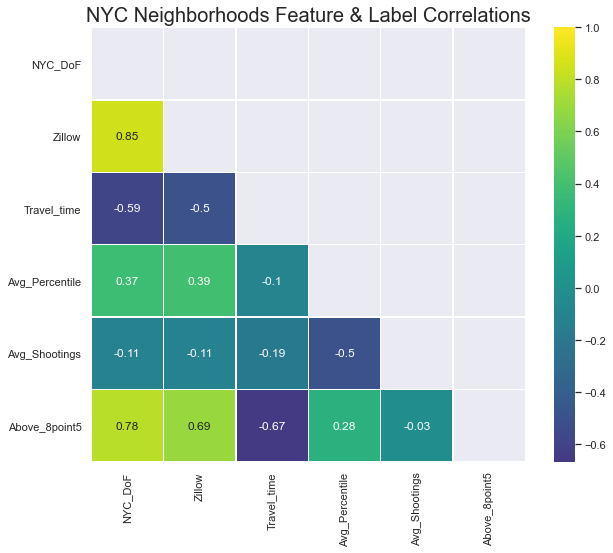

In [547]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, center=0, vmax=1, annot=True, ax=ax);
plt.title("NYC Neighborhoods Feature & Label Correlations", fontsize=20);

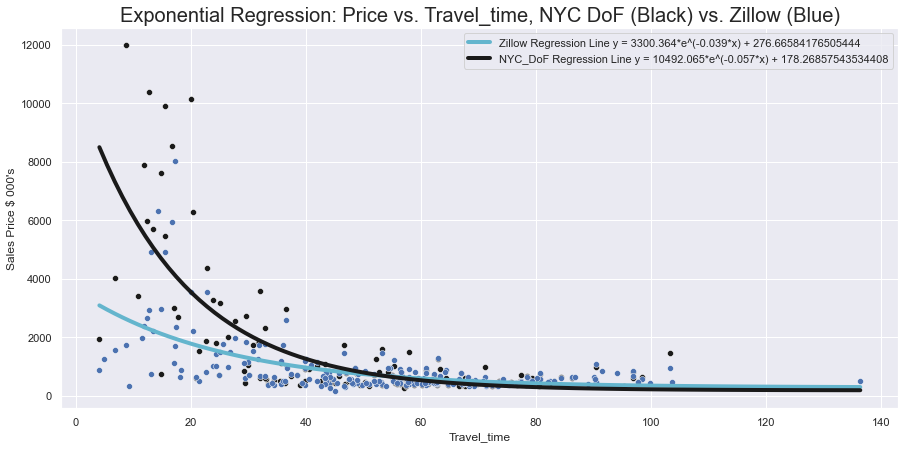

In [548]:
plot_exponential_regression(zillow_analysis_df, regr_summary_df, tgt_column_name_str='Travel_time')

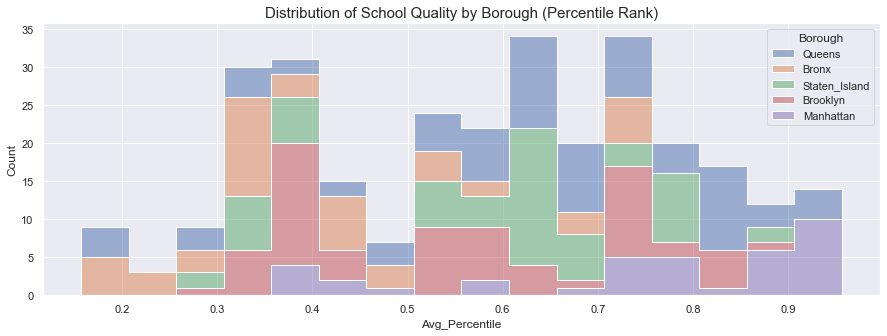

In [545]:
# Let's visualize the distribution of School Quality across each Borough:

plt.figure(figsize=(15,5))
ax = sns.histplot(data=final_school_percentile_avg_df.sort_values(by='Avg_Percentile'), # .droplevel(1, axis=0), 
                  x="Avg_Percentile", hue='Borough',  multiple='stack', # 'stack',
                  stat='count', common_norm=False, # kde=True,  'density'
                  legend=True, #palette="viridis",  # stat='count'
                  binwidth=0.05, alpha=0.5, element='step'); # color=u'b' 
plt.title("Distribution of School Quality by Borough (Percentile Rank)", fontsize=15);

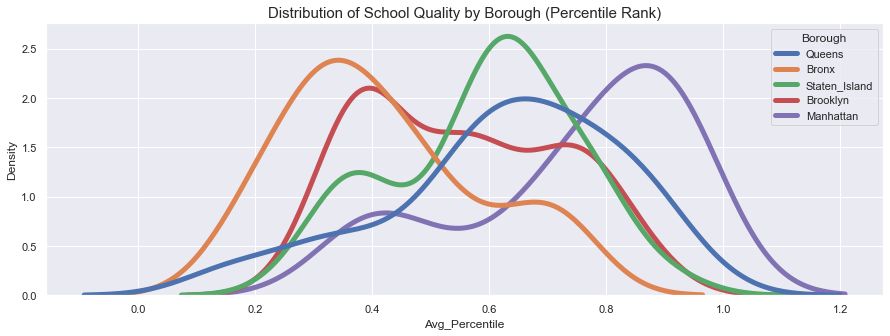

In [546]:
# Same data, just a different visualization: 

plt.figure(figsize=(15,5))
ax = sns.kdeplot(data=final_school_percentile_avg_df.sort_values(by='Avg_Percentile').droplevel(1, axis=0), 
                  x="Avg_Percentile", hue='Borough',  common_norm=False, legend=True, 
                 alpha=0.5, linewidth=5, );
plt.title("Distribution of School Quality by Borough (Percentile Rank)", fontsize=15);


### Some Thoughts on School Quality Across Boroughs:
* Manhattan, as is expected, has a greater concentratation of higher quality schools
* Staten Island seems to have most schools above the 50th percentile, which is better than I anticipated
* Brooklyn acutally has the hump of the distribution below the 50th percentile, as does the Bronx
* Meanwhile, Queens has the bulk of it's distribution above the 50th percentile

The 80th Percentile: 
Regarding the distribution of Borough schools ranked above the 80th percentile, Brooklyn and Staten Island have a similar percentage, Queens has a higher percentage, and the Bronx has a lower percentage. Manhattan has a majority of its schools above this threshold. It's an interesting area of further investigation - how do real estate prices compare between the Manhattan and outer-borough neighborhoods, in neighborhoods with school quality above the 80th percentile? And similarly, how do prices compare in Manhattan and outer-borough neighborhoods with school quality below the 80th percentile? 

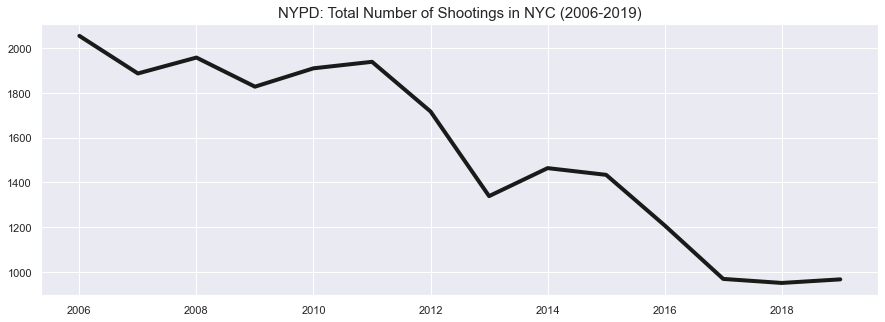

In [558]:
# Number of shootings per year: 
shootings_trajectory_df = pd.read_csv(home_path / 'NYC_Neighborhood_Shootings_Trajectory.csv', index_col=[0,1])
shootings_trajectory_df.drop('Trajectory', axis=1).sum().plot(figsize=(15,5), linewidth=4, color=u'k')
plt.title("NYPD: Total Number of Shootings in NYC (2006-2019)", fontsize=15);


In [605]:
_y = -4
i = 200
i if _y > 0 else (i - 25)

175

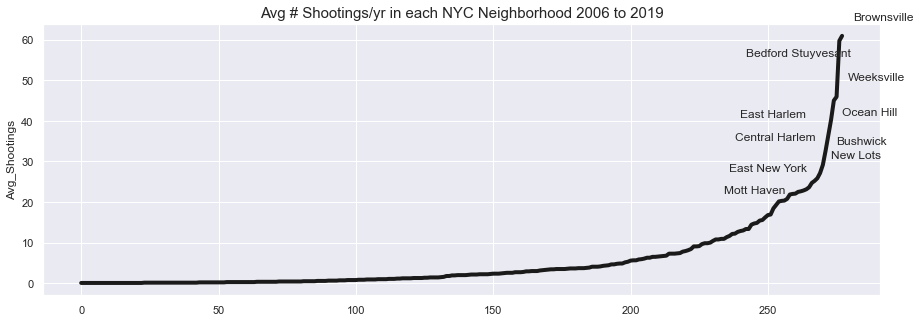

In [622]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=nyc_shootings_avg_df, x=nyc_shootings_avg_df.reset_index().index, y="Avg_Shootings",
                  linewidth=4, color=u'k');
plt.title("Avg # Shootings/yr in each NYC Neighborhood 2006 to 2019", fontsize=15);

y_offset = 5
for i, row in nyc_shootings_avg_df[-10:].iterrows():
    ax.annotate(str(row['Neighborhood']), (i, row['Avg_Shootings']),  # + "," + row['Borough']
                xytext=((i + 5) if y_offset > 0 else (i - 35), row['Avg_Shootings'] + y_offset))
    y_offset = -1*y_offset